# 1. Introducción y Objetivos

En los notebooks previos, se ha abordado el proceso de segmentación y modelado con el objetivo de desarrollar un modelo capaz de detectar y clasificar maniobras a partir de datos sensoriales. En particular, en el Notebook 2, se exploraron distintas estrategias de segmentación y se entrenó el modelo para evaluar su desempeño.

Este notebook se centra en la fase final del análisis, donde se **evaluará** el rendimiento del modelo aplicado a la detección y clasificación de maniobras. Específicamente, los objetivos son:

- **Analizar** el comportamiento del modelo mediante distintas métricas de evaluación (*accuracy, precision, recall y f1-score*).
- **Comparar** la efectividad de dos estrategias de segmentación: ventanas solapadas y ventanas no solapadas, evaluando su impacto en el rendimiento del modelo.
- **Discutir** los hallazgos obtenidos y sus posibles implicaciones, considerando fortalezas y debilidades de cada enfoque.
- **Extraer** conclusiones clave y **proponer** posibles mejoras y futuras direcciones de investigación, incluyendo la aplicabilidad del modelo en entornos de datos en tiempo real o con datos provenientes de vehículos reales.

Con este análisis, se busca no solo **validar** el rendimiento del modelo, sino también **generar** conocimientos útiles para optimizar su aplicación en escenarios reales.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Configurar estilo de seaborn
sns.set_theme(style="whitegrid")

In [2]:
# Cargar el archivo CSV
file_path = "results/global_evaluation_results.csv"
df = pd.read_csv(file_path)

# 2. Evaluación de los Modelos

En este estudio se analizará el desempeño de los modelos de clasificación utilizados para la predicción de maniobras en base a datos obtenidos mediante ventanas deslizantes. La evaluación se realizará considerando dos enfoques separados: **ventanas deslizantes con solapamiento** y **ventanas deslizantes sin solapamiento**, con el objetivo de identificar qué estrategia proporciona mejores resultados. Dentro de cada enfoque, se analizarán distintas maniobras para seleccionar los modelos más efectivos según la tarea de clasificación. Para la evaluación del desempeño de cada modelo, se emplearán tres herramientas de análisis fundamentales:

1. **Curva ROC y AUC**
    - La **curva ROC (*Receiver Operating Characteristic*)** mide el rendimiento del modelo al evaluar la relación entre la **tasa de verdaderos positivos (sensibilidad)** y la **tasa de falsos positivos (1 - especificidad)**.
    - Un **AUC (Área Bajo la Curva) cercano a 1.0** indica un modelo con gran capacidad de discriminación entre clases, mientras que valores más bajos indican menor efectividad.
    - Este análisis permitirá identificar qué modelos tienen un mejor rendimiento en términos de separación entre maniobras y no maniobras.

2. **Matriz de Confusión**
    - Representa la distribución de **predicciones correctas e incorrectas**, permitiendo un análisis más detallado de los errores cometidos por el modelo.
    - Se identifican los **verdaderos positivos (TP), verdaderos negativos (TN), falsos positivos (FP) y falsos negativos (FN)**.  
    - Un modelo efectivo debe minimizar los falsos positivos y falsos negativos, asegurando que la clasificación sea lo más precisa posible.  
    - A través de la matriz de confusión, se evaluará si el modelo tiende a cometer más errores en la detección de ciertas clases y si existe un desbalance significativo en la predicción de maniobras.

3. **Reporte de Clasificación**
    - Este informe proporciona métricas clave como ***precision, recall y f1-score*** para cada clase, además de la **exactitud global (*accuracy*)**.  
    - La ***precision*** mide la proporción de predicciones correctas entre todas las predicciones positivas realizadas por el modelo.  
    - El ***recall*** evalúa la capacidad del modelo para detectar correctamente las instancias de cada clase.  
    - El ***f1-score*** es una métrica combinada que equilibra precisión y recall, siendo útil en escenarios donde hay cierto grado de desbalance de clases.  
    - El objetivo de este análisis es identificar qué modelos logran el mejor equilibrio entre estas métricas.

El análisis se dividirá en dos enfoques principales, modelos con ventanas deslizantes solapadas y no solapadas. Dentro de cada enfoque, se compararán diferentes maniobras, seleccionando los modelos más efectivos para cada una según las métricas analizadas. Esto permitirá identificar qué combinación de maniobra y tipo de ventana proporciona la mejor precisión en la predicción.

## 2.1. Overlapping

### 2.1.1 Overtaking (Adelantamiento)
##### 2.1.1.1 ROC
![ROC - Overtaking - Overlapping](./results/img/roc_curve/roc_curve_overlapping_STISIMData_Overtaking.png)

El área bajo la curva (AUC) de 0.86 indica una buena capacidad discriminativa del modelo. Cuanto más se aproxime la curva ROC a la esquina superior izquierda, mejor separa la clase “adelantamiento” (1) de la clase “no adelantamiento” (0). Con un AUC de 0.86, el modelo logra un equilibrio razonable entre la tasa de verdaderos positivos (TPR) y la tasa de falsos positivos (FPR).

##### 2.1.1.2 Matriz de confusión
![MConfussion - Overtaking - Overlapping](./results/img/confusion_matrix/confusion_matrix_overlapping_STISIMData_Overtaking.png)

- Verdaderos Negativos (TN): 2629 casos en los que realmente no había adelantamiento y el modelo lo predijo correctamente como 0.
- Falsos Positivos (FP): 210 casos en los que no había adelantamiento, pero el modelo predijo 1.
- Falsos Negativos (FN): 1291 casos en los que sí había adelantamiento, pero el modelo no lo detectó (predijo 0).
- Verdaderos Positivos (TP): 2033 casos en los que sí había adelantamiento y el modelo acertó.
La matriz sugiere que el modelo tiende a confundir algunos casos reales de adelantamiento (FN = 1291), lo que afecta especialmente al recall de la clase “adelantamiento”.

##### 2.1.1.3 Reporte de Clasificación
![Report - Overtaking - Overlapping](./results/img/classification_report/classification_report_overlapping_STISIMData_Overtaking.png)

**Clase 0 (no adelantamiento):**
- Recall alto (0.93): el modelo identifica bien la mayoría de los casos sin maniobra.
- Precision moderada (0.67): de todos los que predice como “no adelantamiento”, un 67% son correctos.

**Clase 1 (adelantamiento):**
- Precision alta (0.91): cuando el modelo predice “adelantamiento”, suele acertar.
- Recall más bajo (0.61): hay bastantes adelantamientos reales que el modelo no detecta (FN).
- Exactitud global (~0.76): un 76% de aciertos totales.

F1-score de la clase 1 (0.73): refleja que, si bien la precisión es buena, la tasa de verdaderos positivos es limitada (recall = 0.61).

*Interpretación:*

El modelo tiende a ser conservador a la hora de declarar adelantamiento (pocos falsos positivos), pero a costa de no detectar todos los adelantamientos reales (FN elevados).
La alta precisión para la clase 1 evita “falsas alarmas” pero el recall moderado indica que no se capturan todos los adelantamientos.

### 2.1.2. Maniobra: Detenerse (Stopping)  
##### 2.1.2.1 ROC
![ROC - Stopping - Overlapping](./results/img/roc_curve/roc_curve_overlapping_STISIMData_Stopping.png)

Capacidad discriminativa alta: Un AUC de 0.91 indica que el modelo separa de manera efectiva los instantes en que se produce la maniobra de “detenerse” frente a los que no.
Cuanto más se aproxime la curva ROC a la esquina superior izquierda, mejor distingue la clase positiva (stopping). Con 0.91, se sitúa en un rango considerado bueno.

##### 2.1.2.2 Matriz de confusión
![MConfussion - Stopping - Overlapping](./results/img/confusion_matrix/confusion_matrix_overlapping_STISIMData_Stopping.png)

**Clase 0 (No detenerse):**
- **TN = 8434:** casos correctos de “no detenerse”.
- **FP = 190:** pocos casos donde el modelo dice “detenerse” pero realmente no ocurría.

**Clase 1 (Detenerse):**
- **FN = 1028:** el modelo no detectó parte de los casos reales de detención.
- **TP = 1889:** el modelo acierta en bastantes casos de detención.

El mayor volumen de datos está en la clase 0, lo cual es normal si la maniobra de detención ocupa menos tiempo. Aun así, se observa un número de falsos negativos significativo (1028), indicando que no todos los eventos de “detenerse” son capturados.

##### 2.1.2.3 Reporte de Clasificación
![Report - Stopping - Overlapping](./results/img/classification_report/classification_report_overlapping_STISIMData_Stopping.png)

**Clase 0 (No detenerse):**
- Precision alta (0.89) y recall muy alto (0.98): el modelo identifica correctamente la mayoría de los casos en los que no se produce la maniobra.

**Clase 1 (Detenerse):**
- Precision moderada (0.65): de todos los casos que predice como “detenerse”, un 65% son correctos.
- Recall (0.76): el modelo detecta alrededor de las tres cuartas partes de las detenciones reales, aunque deja escapar ~24% (falsos negativos).

**Exactitud global (0.89):** un 89% de aciertos totales en la clasificación.

**Macro F1 (0.84):** refleja que la clase mayoritaria (no detenerse) tiene mejor rendimiento que la clase “detenerse”, lo que reduce un poco el promedio.



### 2.1.3. Maniobra: Realizar giro convencional (Turnings)  
##### 2.1.3.1 ROC
![ROC - Turnings - Overlapping](./results/img/roc_curve/roc_curve_overlapping_STISIMData_Turnings.png)

El AUC de 0.92 indica que el modelo distingue de manera sólida los instantes en los que se realiza un giro de aquellos en los que no se realiza. 
La curva se aproxima de forma notable a la esquina superior izquierda, lo que sugiere una capacidad discriminativa alta.

##### 2.1.3.2 Matriz de confusión
![MConfussion - Turnings - Overlapping](./results/img/confusion_matrix/confusion_matrix_overlapping_STISIMData_Turnings.png)

**Clase 0 (no giro):**
- **TN = 5782:** el modelo acierta la mayoría de los casos donde no hay giro.
- **FP = 238:** relativamente pocos casos en los que se predice “giro” sin que realmente ocurra.

**Clase 1 (giro):**
- **FN = 1143:** el modelo no detecta una parte significativa de los giros reales.
- **TP = 4098:** acierta en un buen número de giros.

##### 2.1.3.3 Reporte de Clasificación
![Report - Turnings - Overlapping](./results/img/classification_report/classification_report_overlapping_STISIMData_Turnings.png)

**Clase 0 (no giro):**
- **Precision (0.83):** de los casos que el modelo predice como “no giro”, un 83% son correctos.
- **Recall (0.96):** el modelo identifica la gran mayoría de instantes sin giro.

**Clase 1 (giro):**
- **Precision (~0.94):** cuando predice “giro”, acierta en la mayoría de los casos.
- **Recall (~0.78/0.79):** hay un porcentaje relevante de giros reales que no se capturan (FN).

**Exactitud global (~0.88):** un 88% de aciertos totales.

**Macro F1 (~0.87):** refleja un rendimiento equilibrado entre las dos clases, aunque la clase “giro” es la que limita un poco el recall global.

### 2.1.4. Maniobra: Realizar giro en tres pasos (3-step Turnings)
##### 2.1.4.1 ROC
![ROC - 3step Turnings - Overlapping](./results/img/roc_curve/roc_curve_overlapping_STISIMData_3step-Turnings.png)

Cuenta con una elevada capacidad de discriminación, pues un AUC de 0.93 indica que el modelo separa de forma sólida los instantes en los que se produce la maniobra “giro en tres pasos” de aquellos en los que no.
La curva ROC se aproxima bastante a la esquina superior izquierda, lo que evidencia un buen equilibrio entre la tasa de verdaderos positivos y la tasa de falsos positivos.

##### 2.1.4.2 Matriz de confusión
![MConfussion - 3step Turnings - Overlapping](./results/img/confusion_matrix/confusion_matrix_overlapping_STISIMData_3step-Turnings.png)

**Clase 0 (no giro en tres pasos)**
- **TN = 2831:** el modelo identifica correctamente la mayoría de los casos en que no hay giro en tres pasos.
- **FP = 318:** un número relativamente bajo de falsos positivos (casos sin giro en tres pasos que el modelo predijo como giro).

**Clase 1 (giro en tres pasos)**
- **FN = 906:** el modelo no detecta algunos giros en tres pasos reales.
- **TP = 4587:** acierta en la mayoría de los casos con giro en tres pasos.

##### 2.1.4.3 Reporte de Clasificación
![Report - 3step Turnings - Overlapping](./results/img/classification_report/classification_report_overlapping_STISIMData_3step-Turnings.png)

**Clase 0 (no giro en tres pasos)**
- **Precision (0.76):** De todos los casos predichos como “no giro”, un 76% son correctos.
- **Recall (0.90):** El modelo detecta la mayor parte de los casos en que realmente no hay giro.

**Clase 1 (giro en tres pasos)**
- **Precision (0.94):** Cuando el modelo predice “giro en tres pasos”, acierta en la gran mayoría de los casos.
- **Recall (0.84):** Aun así, deja sin detectar un ~16% de giros reales (FN).

**Exactitud global (0.86):** Un 86% de aciertos totales. 

**Macro F1 (~0.85):** Refleja un rendimiento equilibrado entre las dos clases, aunque la clase 1 sea la más crítica de detectar.


### 2.1.5. Maniobra: Realizar giro en U (U-Turnings)  
##### 2.1.5.1 ROC
![ROC - U Turnings - Overlapping](./results/img/roc_curve/roc_curve_overlapping_STISIMData_U-Turnings.png)

Presenta una capacidad discriminativa limitada, pues con un AUC de 0.55, el modelo está apenas por encima de un clasificador aleatorio ( AUC = 0.5).
La curva ROC se aproxima demasiado a la diagonal, lo que indica dificultad para separar los casos de “giro en U” de los que no lo son.

##### 2.1.5.2 Matriz de confusión
![MConfussion - U Turnings - Overlapping](./results/img/confusion_matrix/confusion_matrix_overlapping_STISIMData_U-Turnings.png)

**Clase 0 (no giro en U)**
- **TN = 2235:** el modelo acierta una parte considerable de los casos donde no hay giro en U.
- **FP = 1061:** sin embargo, hay un número significativo de casos donde se predice “giro en U” sin que ocurra realmente.

**Clase 1 (giro en U)**
- **FN = 1507:** el modelo no detecta muchos giros en U reales.
- **TP = 1161:** solo una parte de los giros en U son reconocidos correctamente.

##### 2.1.5.3 Reporte de Clasificación
![Report - U Turnings - Overlapping](./results/img/classification_report/classification_report_overlapping_STISIMData_U-Turnings.png)

**Clase 0 (no giro en U)**
- **Precision (~0.60):** De todos los casos que predice como “no giro en U”, un 60% acierta.
- **Recall (~0.68):** Detecta la mayoría de los casos sin giro en U, pero no de forma tan contundente como en maniobras anteriores.

**Clase 1 (giro en U)**
- **Precision (~0.52):** Cuando el modelo predice “giro en U”, acierta poco más de la mitad de las veces.
- **Recall (~0.44):** Deja escapar más de la mitad de los giros en U reales (FN elevados).

**Exactitud global (~0.57):** Un 57% de aciertos totales, lo que es bajo en comparación con el resto de maniobras analizadas.

**Macro F1 (~0.55):** Refleja que ambas clases tienen un rendimiento bastante modesto, especialmente la clase “giro en U”.

## 2.2. Non-Overlapping

### 2.2.1. Maniobra: Adelantar (Overtaking)
##### 2.2.1.1 ROC
![ROC - Overtaking - Non Overlapping](./results/img/roc_curve/roc_curve_non_overlapping_STISIMData_Overtaking.png)


##### 2.2.1.2 Matriz de confusión
![MConfussion - Overtaking - Non Overlapping](./results/img/confusion_matrix/confusion_matrix_non_overlapping_STISIMData_Overtaking.png)


##### 2.2.1.3 Reporte de Clasificación
![Report - Overtaking - Non Overlapping](./results/img/classification_report/classification_report_non_overlapping_STISIMData_Overtaking.png)

### 2.2.2. Maniobra: Detenerse (Stopping)
##### 2.2.2.1 ROC
![ROC - Stopping - Non Overlapping](./results/img/roc_curve/roc_curve_non_overlapping_STISIMData_Stopping.png)


##### 2.2.2.2 Matriz de confusión
![MConfussion - Stopping - Non Overlapping](./results/img/confusion_matrix/confusion_matrix_non_overlapping_STISIMData_Stopping.png)


##### 2.2.2.3 Reporte de Clasificación
![Report - Stopping - Non Overlapping](./results/img/classification_report/classification_report_non_overlapping_STISIMData_Stopping.png)



### 2.2.3. Maniobra: Realizar giro convencional (Turnings)
##### 2.2.3.1 ROC
![ROC - Turnings - Non Overlapping](./results/img/roc_curve/roc_curve_non_overlapping_STISIMData_Turnings.png)


##### 2.2.3.2 Matriz de confusión
![MConfussion - Turnings - Non Overlapping](./results/img/confusion_matrix/confusion_matrix_non_overlapping_STISIMData_Turnings.png)


##### 2.2.3.3 Reporte de Clasificación
![Report - Turnings - Non Overlapping](./results/img/classification_report/classification_report_non_overlapping_STISIMData_Turnings.png)



### 2.2.4. Maniobra: Realizar giro en tres pasos (3-step Turnings)
##### 2.2.4.1 ROC
![ROC - 3step Turnings - Non Overlapping](./results/img/roc_curve/roc_curve_non_overlapping_STISIMData_3step-Turnings.png)


##### 2.2.4.2 Matriz de confusión
![MConfussion - 3step Turnings - Non Overlapping](./results/img/confusion_matrix/confusion_matrix_non_overlapping_STISIMData_3step-Turnings.png)


##### 2.2.4.3 Reporte de Clasificación
![Report - 3step Turnings - Non Overlapping](./results/img/classification_report/classification_report_non_overlapping_STISIMData_3step-Turnings.png)

### 2.2.5. Maniobra: Realizar giro en U (U-Turnings)  
##### 2.2.5.1 ROC
![ROC - U Turnings - Non Overlapping](./results/img/roc_curve/roc_curve_non_overlapping_STISIMData_U-Turnings.png)


##### 2.2.5.2 Matriz de confusión
![MConfussion - U Turnings - Non Overlapping](./results/img/confusion_matrix/confusion_matrix_non_overlapping_STISIMData_U-Turnings.png)


##### 2.2.5.3 Reporte de Clasificación
![Report - U Turnings - Non Overlapping](./results/img/classification_report/classification_report_non_overlapping_STISIMData_U-Turnings.png)

# 3. Análisis de Maniobras

El objetivo del análisis gráfico es comparar el rendimiento del modelo en función de diferentes estrategias de segmentación y parámetros de procesamiento del conjunto de datos original. A través de estas visualizaciones, se busca entender cómo influyen el tamaño de ventana y la normalización en la clasificación de maniobras. Las gráficas analizadas incluyen:

- **Diagramas de barras**: Comparan las métricas de evaluación (*accuracy, precision, recall y f1-score*) para cada tamaño de ventana y tipo de escalado, diferenciando entre segmentación con ventanas solapadas y no solapadas.
- **Boxplots**: Representan la distribución de las métricas de rendimiento en función del tipo de segmentación y el escalador aplicado, permitiendo analizar la dispersión y variabilidad de los resultados.
- **Gráficas de línea**: Muestran la evolución del rendimiento del modelo a medida que varía el tamaño de ventana, diferenciando entre estrategias de segmentación y tipos de normalización.

Estas visualizaciones facilitarán la interpretación de los resultados y permitirán extraer conclusiones sobre la mejor estrategia de segmentación para cada una de las maniobras.

## 3.1. 3-Step Turnings

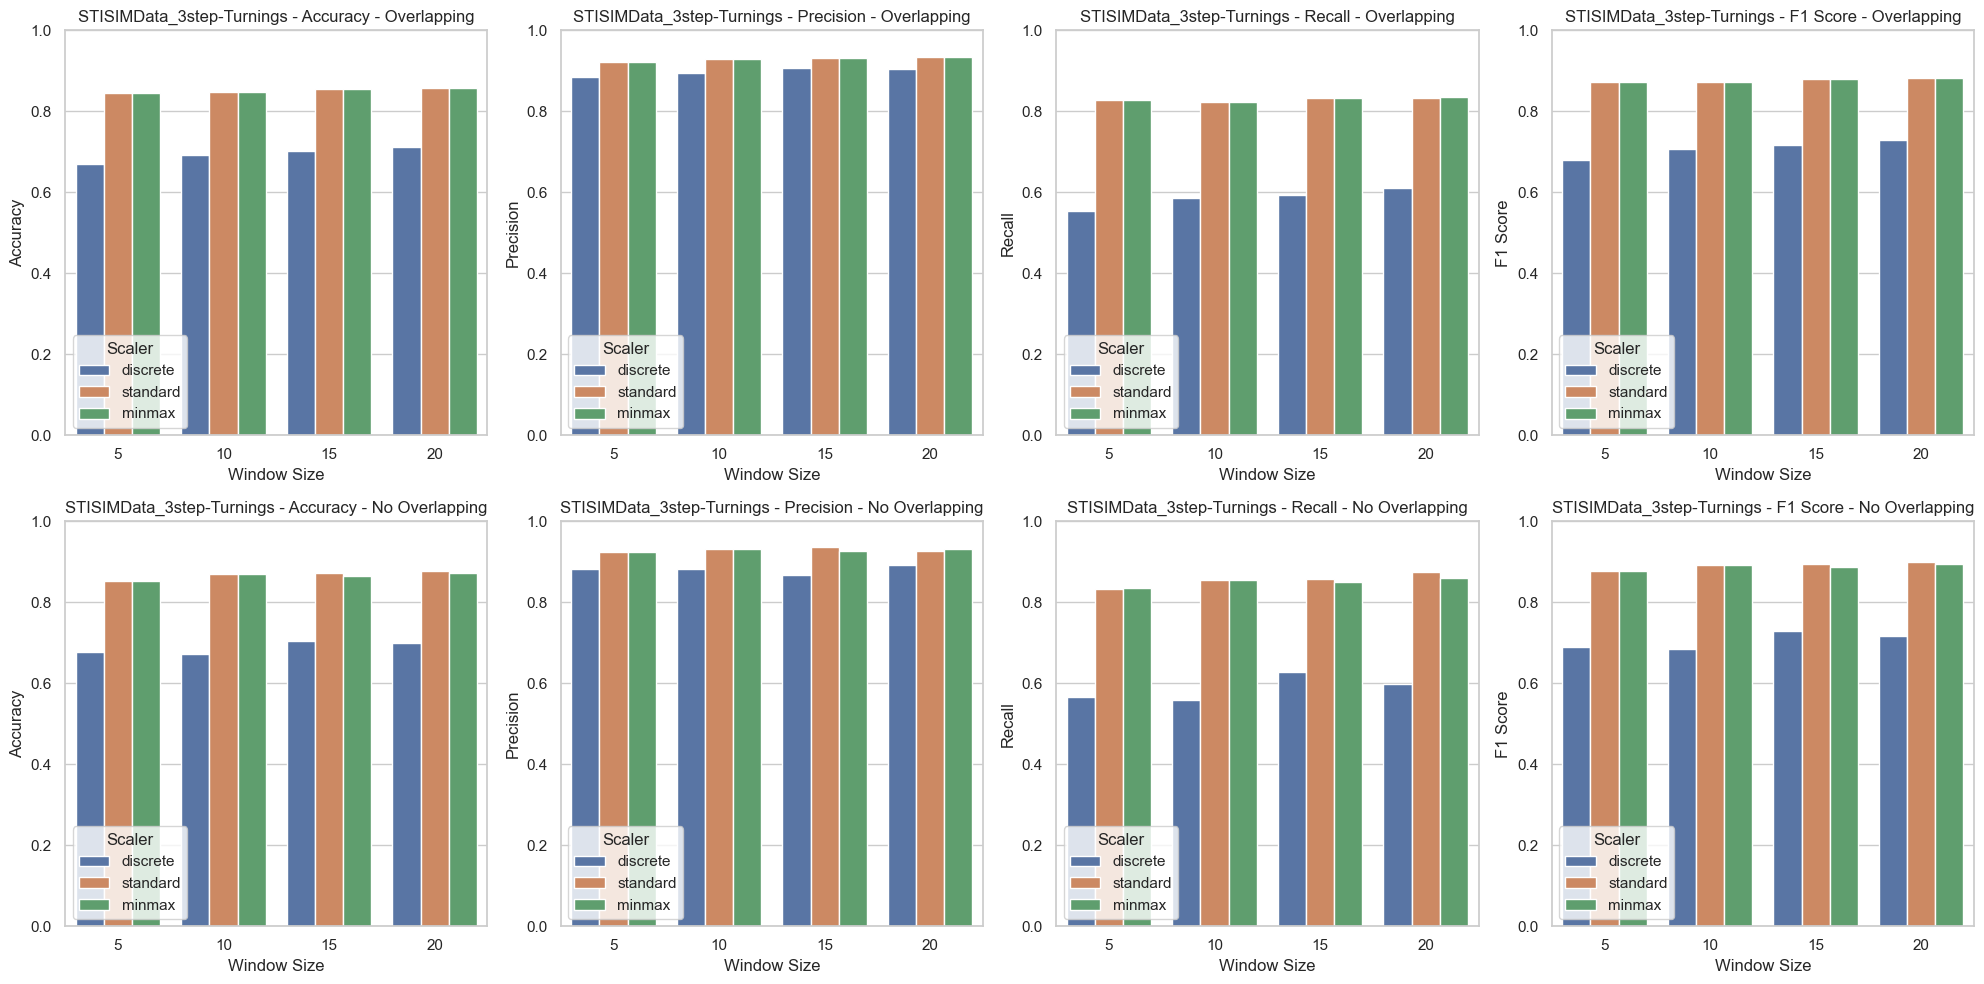

In [3]:
# Definir métricas a analizar
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

# Crear gráficos para cada maniobra con subgráficas por métrica
maneuver = 'STISIMData_3step-Turnings'
fig, axes = plt.subplots(2, len(metrics), figsize=(20, 10))
maneuver_data = df[df['Maneuver'] == maneuver]

seg_man_data = maneuver_data[maneuver_data['Segmentation'] == 'overlapping']
for j, metric in enumerate(metrics):
    sns.barplot(x='Window Size', y=metric, hue='Scaler', data=seg_man_data, ax=axes[0, j])
    axes[0, j].set_title(f"{maneuver} - {metric} - Overlapping")
    axes[0, j].set_xlabel("Window Size")
    axes[0, j].set_ylabel(metric)
    axes[0, j].legend(title='Scaler', loc='lower left')
    axes[0, j].set_ylim(0, 1)

seg_man_data = maneuver_data[maneuver_data['Segmentation'] == 'non_overlapping']
for j, metric in enumerate(metrics):
    sns.barplot(x='Window Size', y=metric, hue='Scaler', data=seg_man_data, ax=axes[1, j])
    axes[1, j].set_title(f"{maneuver} - {metric} - No Overlapping")
    axes[1, j].set_xlabel("Window Size")
    axes[1, j].set_ylabel(metric)
    axes[1, j].legend(title='Scaler', loc='lower left')
    axes[1, j].set_ylim(0, 1)

plt.tight_layout()
plt.show()

En la fila superior de gráficos se aprecia el comportamiento de las ventanas deslizantes con solapamiento, mientras que en la fila inferior se observa el de las ventanas deslizantes sin solapamiento. En relación a las 4 métricas analizadas (*accuracy, precision, recall y f1-score*), se aprecia unos valores similares, tanto con ventanas con solapamiento como sin solapamiento, frente a los escalados utilizados para los conjuntos de datos, siendo superior aquellos modelos con un escalado estándar o de máximos y mínimos frente a la aplicación de una discretización de los datos, obteniendo entre 10 puntos menos en los mejores casos y 20 puntos menos en los peores casos. Esto se puede deber a una posible pérdida de información y consistencia de la misma, permitiendo a los otros dos escalados ofrecer mejores resultados al mantener la coherencia de los datos en bruto. Por último, destacar que, para la métrica principal evaluada, según *f1-score*, el mejor modelo para predecir la acción de giro en 3 pasos es con el conjunto de datos con un escalado estándar.

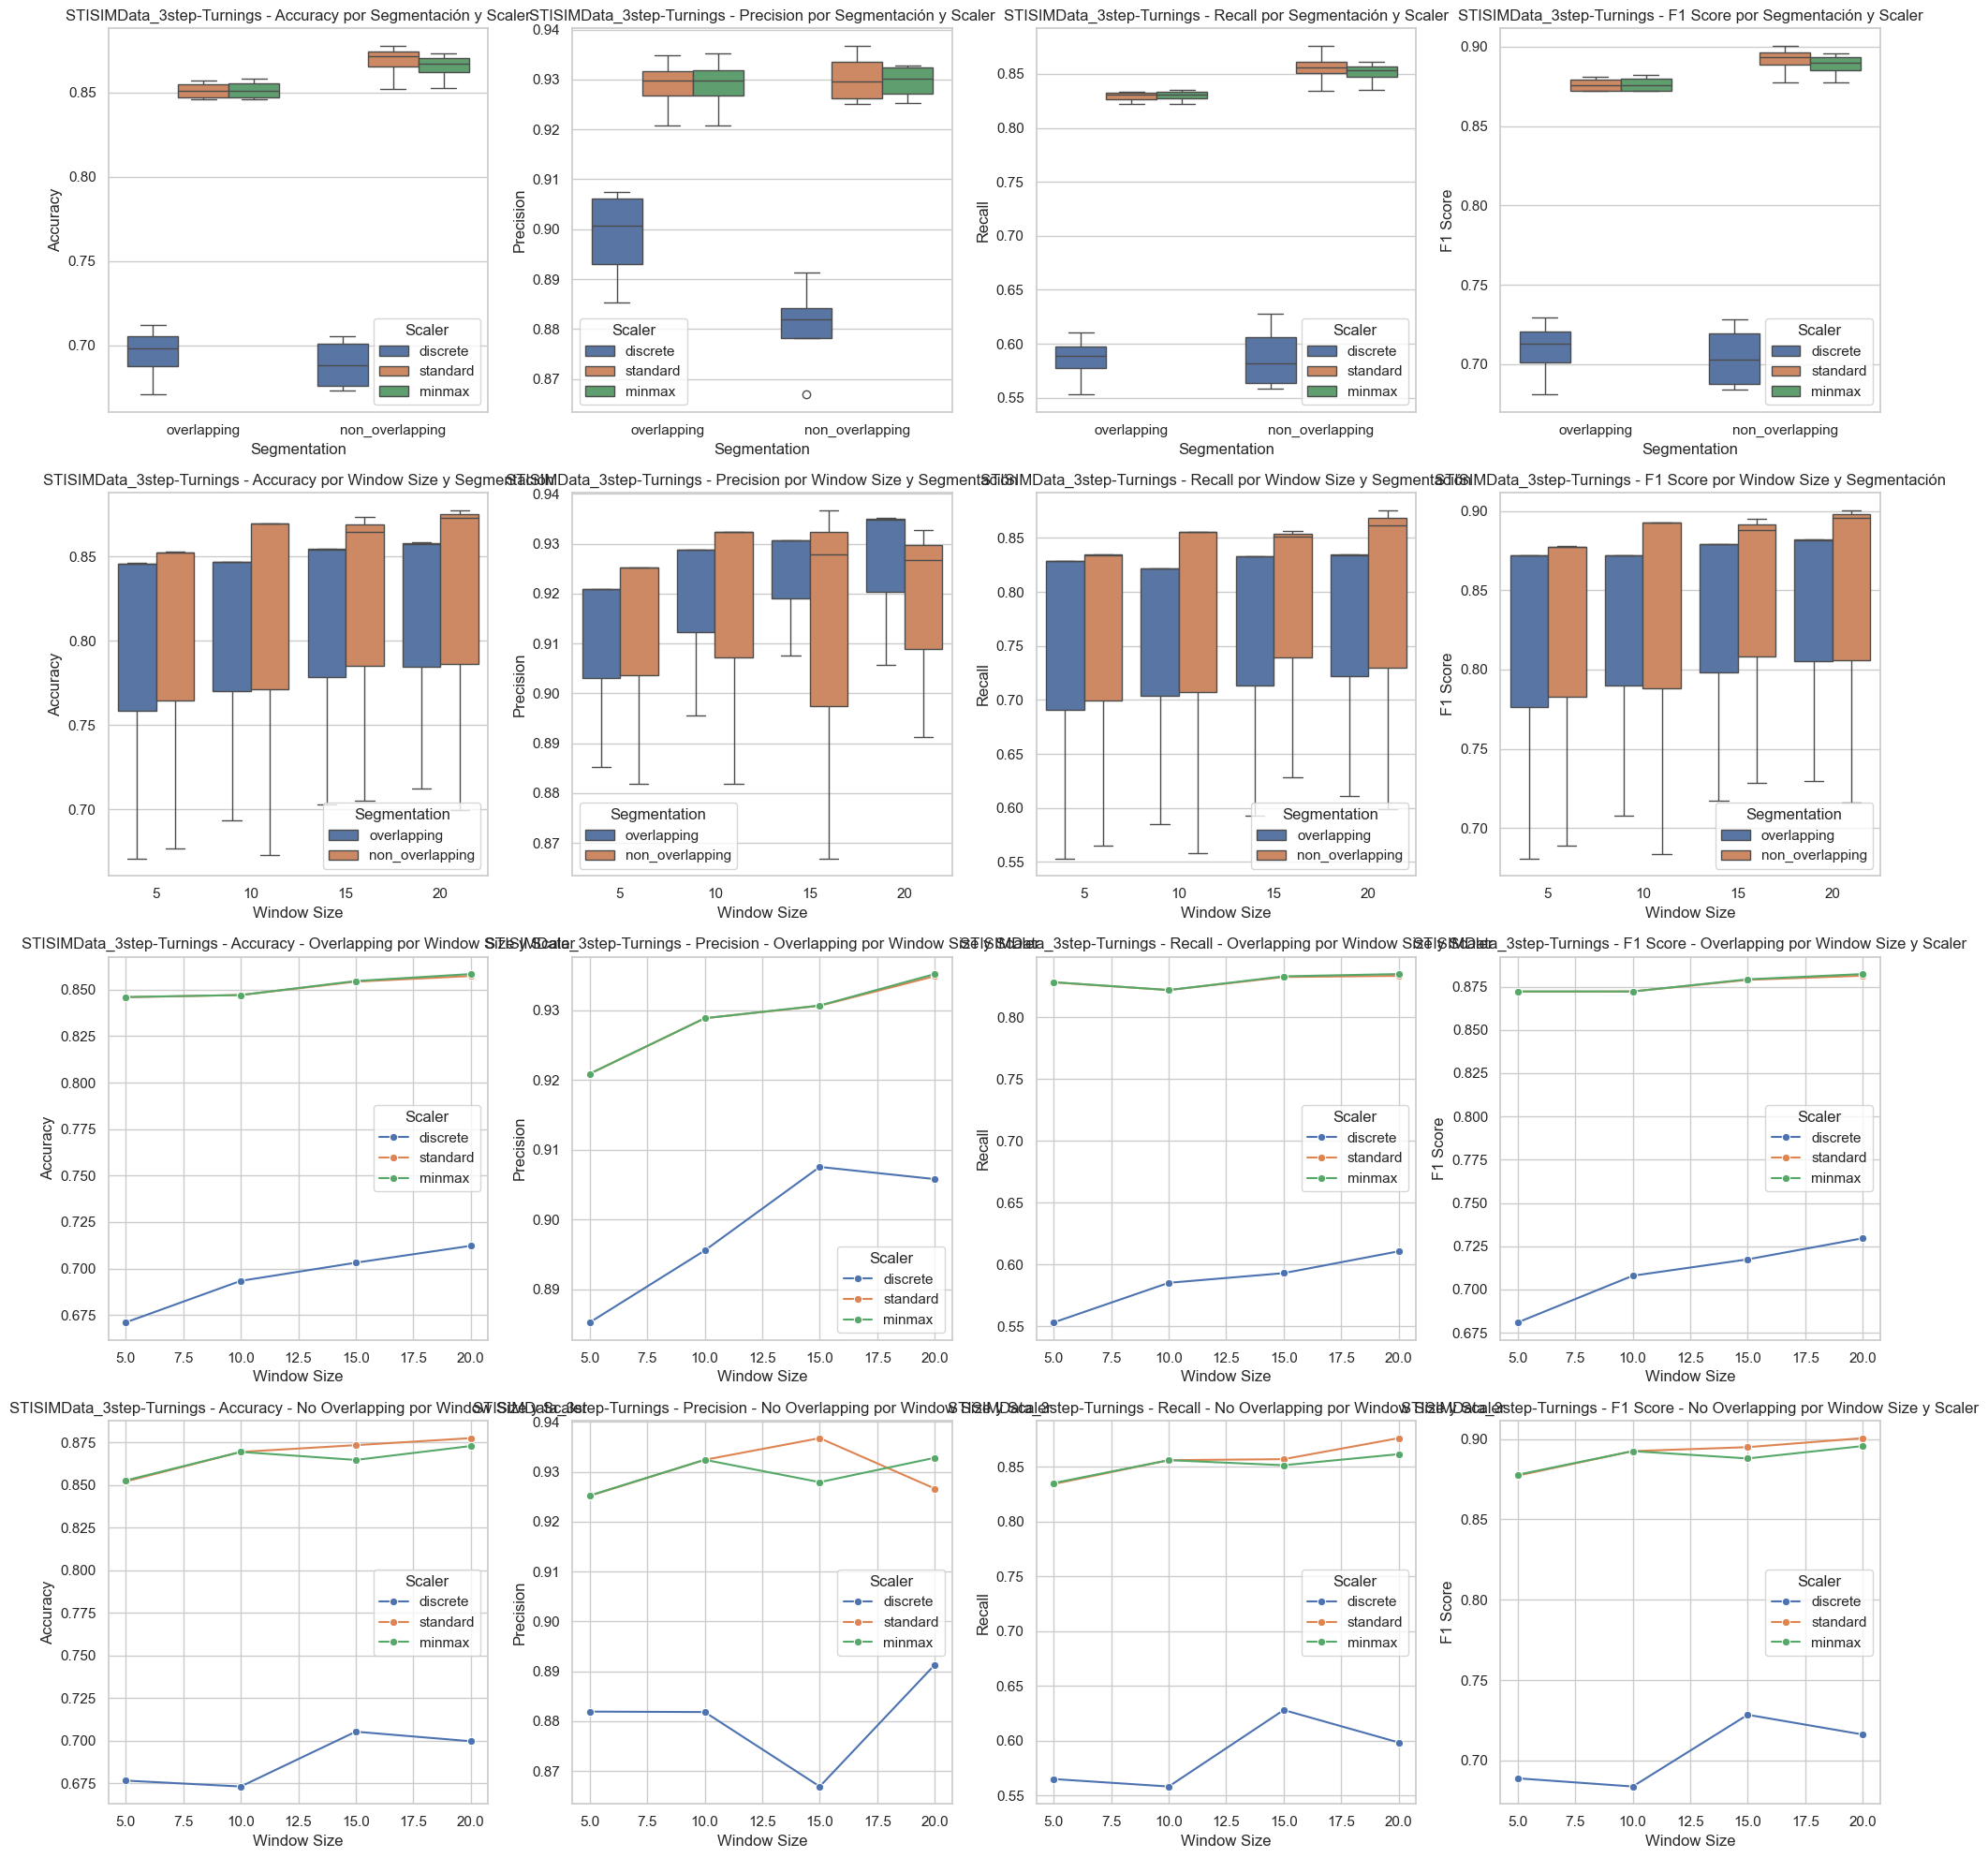

In [4]:
fig, axes = plt.subplots(4, len(metrics), figsize=(20, 20))

for j, metric in enumerate(metrics):
    sns.boxplot(x='Segmentation', y=metric, hue='Scaler', data=maneuver_data, ax=axes[0, j])
    axes[0, j].set_title(f"{maneuver} - {metric} por Segmentación y Scaler")
    axes[0, j].set_xlabel("Segmentation")
    axes[0, j].set_ylabel(metric)
    axes[0, j].legend(title='Scaler')

    sns.boxplot(x='Window Size', y=metric, hue='Segmentation', data=maneuver_data, ax=axes[1, j])
    axes[1, j].set_title(f"{maneuver} - {metric} por Window Size y Segmentación")
    axes[1, j].set_xlabel("Window Size")
    axes[1, j].set_ylabel(metric)
    axes[1, j].legend(title='Segmentation')
    
    seg_man_data = maneuver_data[maneuver_data['Segmentation'] == 'overlapping']
    sns.lineplot(x='Window Size', y=metric, hue='Scaler', data=seg_man_data, marker='o', ax=axes[2, j])
    axes[2, j].set_title(f"{maneuver} - {metric} - Overlapping por Window Size y Scaler")
    axes[2, j].set_xlabel("Window Size")
    axes[2, j].set_ylabel(metric)
    axes[2, j].legend(title='Scaler')

    seg_man_data = maneuver_data[maneuver_data['Segmentation'] == 'non_overlapping']
    sns.lineplot(x='Window Size', y=metric, hue='Scaler', data=seg_man_data, marker='o', ax=axes[3, j])
    axes[3, j].set_title(f"{maneuver} - {metric} - No Overlapping por Window Size y Scaler")
    axes[3, j].set_xlabel("Window Size")
    axes[3, j].set_ylabel(metric)
    axes[3, j].legend(title='Scaler')

plt.tight_layout()
plt.show()

A su vez, analizando y comparando la diferencia de modelos frente a ventanas con y sin solapamiento, destaca los resultados superiores en las métricas evaluadas aquellos modelos donde el conjunto de datos está con ventanas sin solapamiento frente a conjuntos con ventanas sin solapamiento. Esto es debido a que se ha producido un *overfitting* en los datos para las ventanas con solapamiento, cogiendo más fuerza aquellos conjuntos de datos con una mayor generalización de la información. Esto ocurre con aquellos conjuntos donde se ha utilizado un escalado estándar o de mínimos y máximos, por el contrario, en los conjuntos con una discretización de los datos se obtienen mejores valores en las métricas con ventanas con solapamiento que sin solapamiento. Esto es debido a que la discretización ofrece una generalización ya de los datos, siendo redundante el uso de ventanas sin solapamiento y facilitando dicha tarea a las ventanas con solapamiento que no implementan dicha generalización de los datos.

En relación a las dos últimas filas de gráficas, se observa una clara diferencia entre los datos discretizados frente a los datos escalados, obteniendo para cualquier tamaño de ventana y con o sin solapamiento, mejores valores en las métricas en aquellos conjuntos escalados. A su vez, se observa un comportamiento similar frente a las ventanas con solapamiento y sin solapamiento frente al escalado. Añadir que, de manera general, el aumento del tamaño de ventana, permite al modelo obtener una mejor comprensión de los datos, obteniendo mejores resultados.

Como conclusión, el mejor modelo obtenido para la predicción de la acción de giro en 3 pasos es aquel con un conjunto de datos con ventanas deslizantes sin solapamiento de tamaño 20 aplicado con un escalado estándar, resultando con un valor *f1-score* de $0.90$. Se destaca también el mejor modelo con ventanas con solapamiento, teniendo un valor de $0.88$ en *f1-score*, teniendo un resultado similar debido a que en la creación del modelo toma especialmente relevancia el preprocesado de los datos y el escalado de los mismos. Destacar que los resultados del tipo de segmentación son similares y la mejoría de los modelos en relación directa con el aumento del tamaño de ventana.

## 3.2. Overtaking

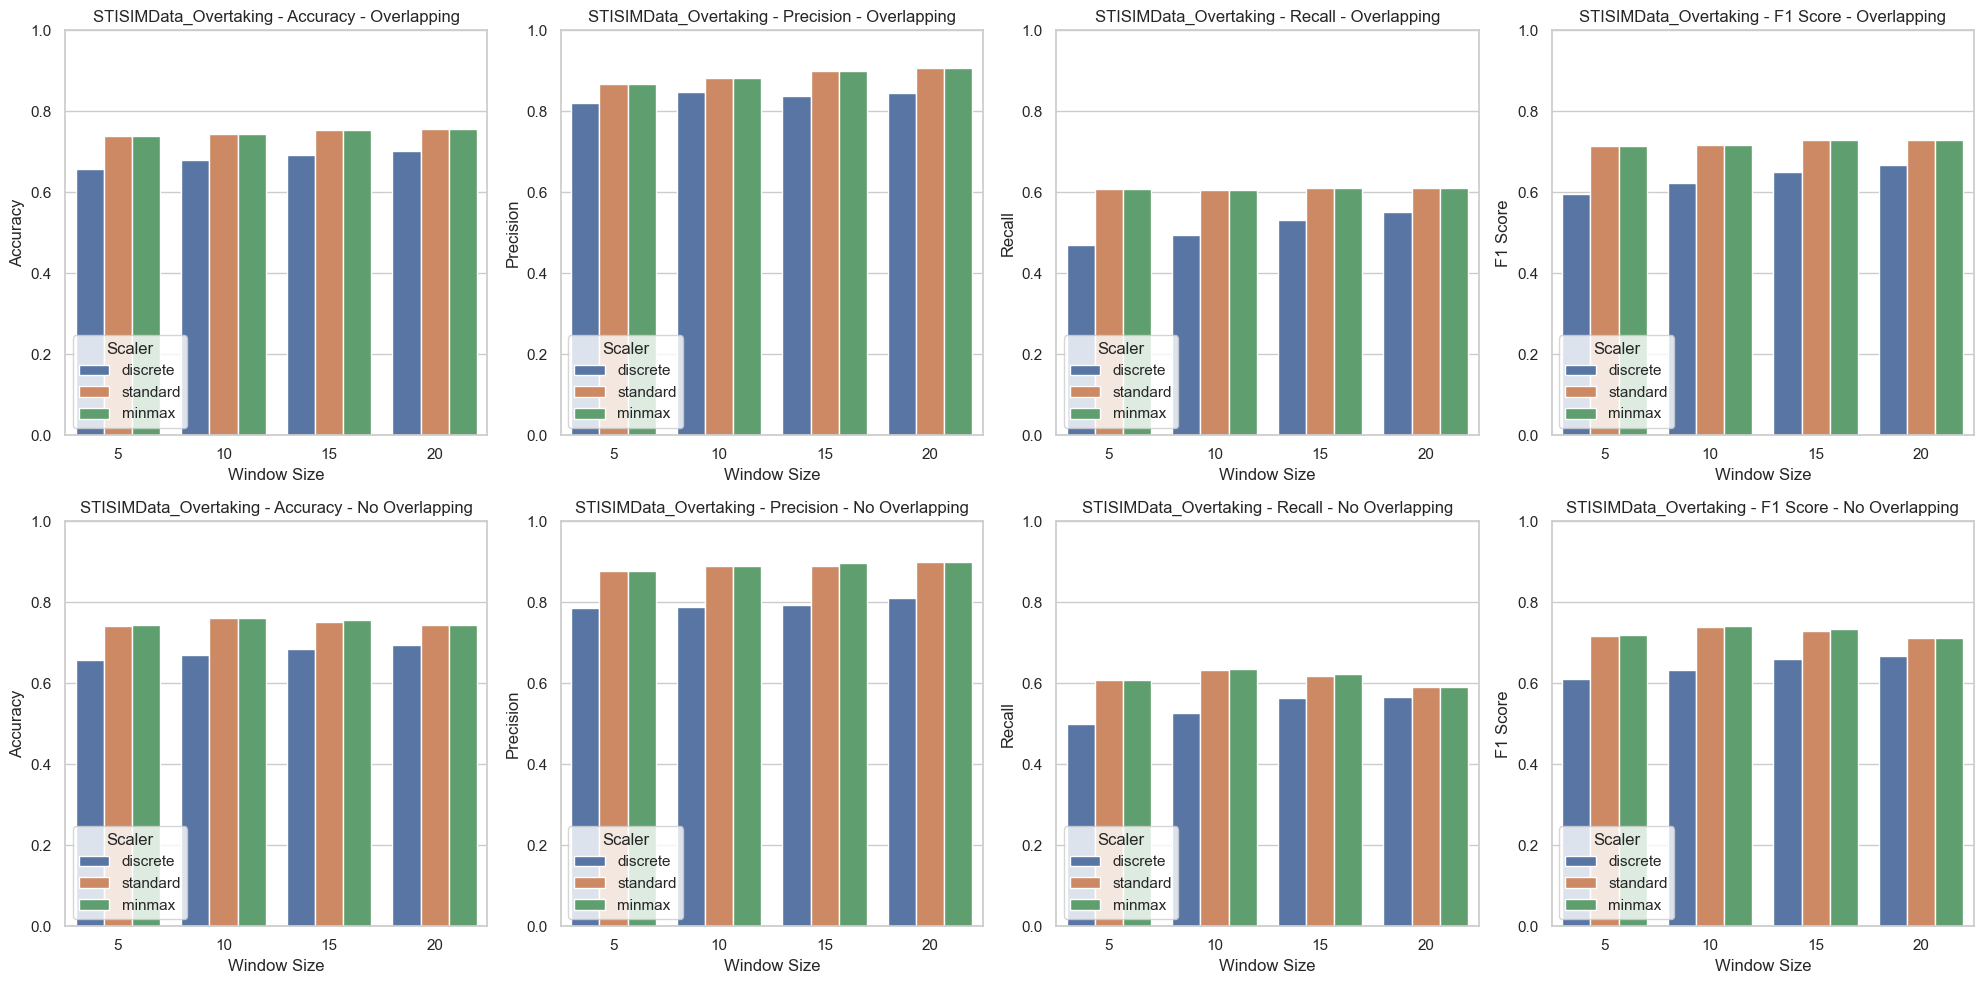

In [5]:
# Crear gráficos para cada maniobra con subgráficas por métrica
maneuver = 'STISIMData_Overtaking'
fig, axes = plt.subplots(2, len(metrics), figsize=(20, 10))
maneuver_data = df[df['Maneuver'] == maneuver]

seg_man_data = maneuver_data[maneuver_data['Segmentation'] == 'overlapping']
for j, metric in enumerate(metrics):
    sns.barplot(x='Window Size', y=metric, hue='Scaler', data=seg_man_data, ax=axes[0, j])
    axes[0, j].set_title(f"{maneuver} - {metric} - Overlapping")
    axes[0, j].set_xlabel("Window Size")
    axes[0, j].set_ylabel(metric)
    axes[0, j].legend(title='Scaler', loc='lower left')
    axes[0, j].set_ylim(0, 1)

seg_man_data = maneuver_data[maneuver_data['Segmentation'] == 'non_overlapping']
for j, metric in enumerate(metrics):
    sns.barplot(x='Window Size', y=metric, hue='Scaler', data=seg_man_data, ax=axes[1, j])
    axes[1, j].set_title(f"{maneuver} - {metric} - No Overlapping")
    axes[1, j].set_xlabel("Window Size")
    axes[1, j].set_ylabel(metric)
    axes[1, j].legend(title='Scaler', loc='lower left')
    axes[1, j].set_ylim(0, 1)

plt.tight_layout()
plt.show()

Siguiendo el mismo patrón de análisis, se observa que los modelos con un escalado estándar o de máximos y mínimos presentan un mejor rendimiento en comparación con la discretización de los datos. La diferencia en las métricas varía entre 10 y 20 puntos, lo que sugiere que la discretización puede introducir una pérdida de información relevante. El modelo con mejor desempeño, según la métrica *f1-score*, corresponde al conjunto de datos con un escalado estándar.

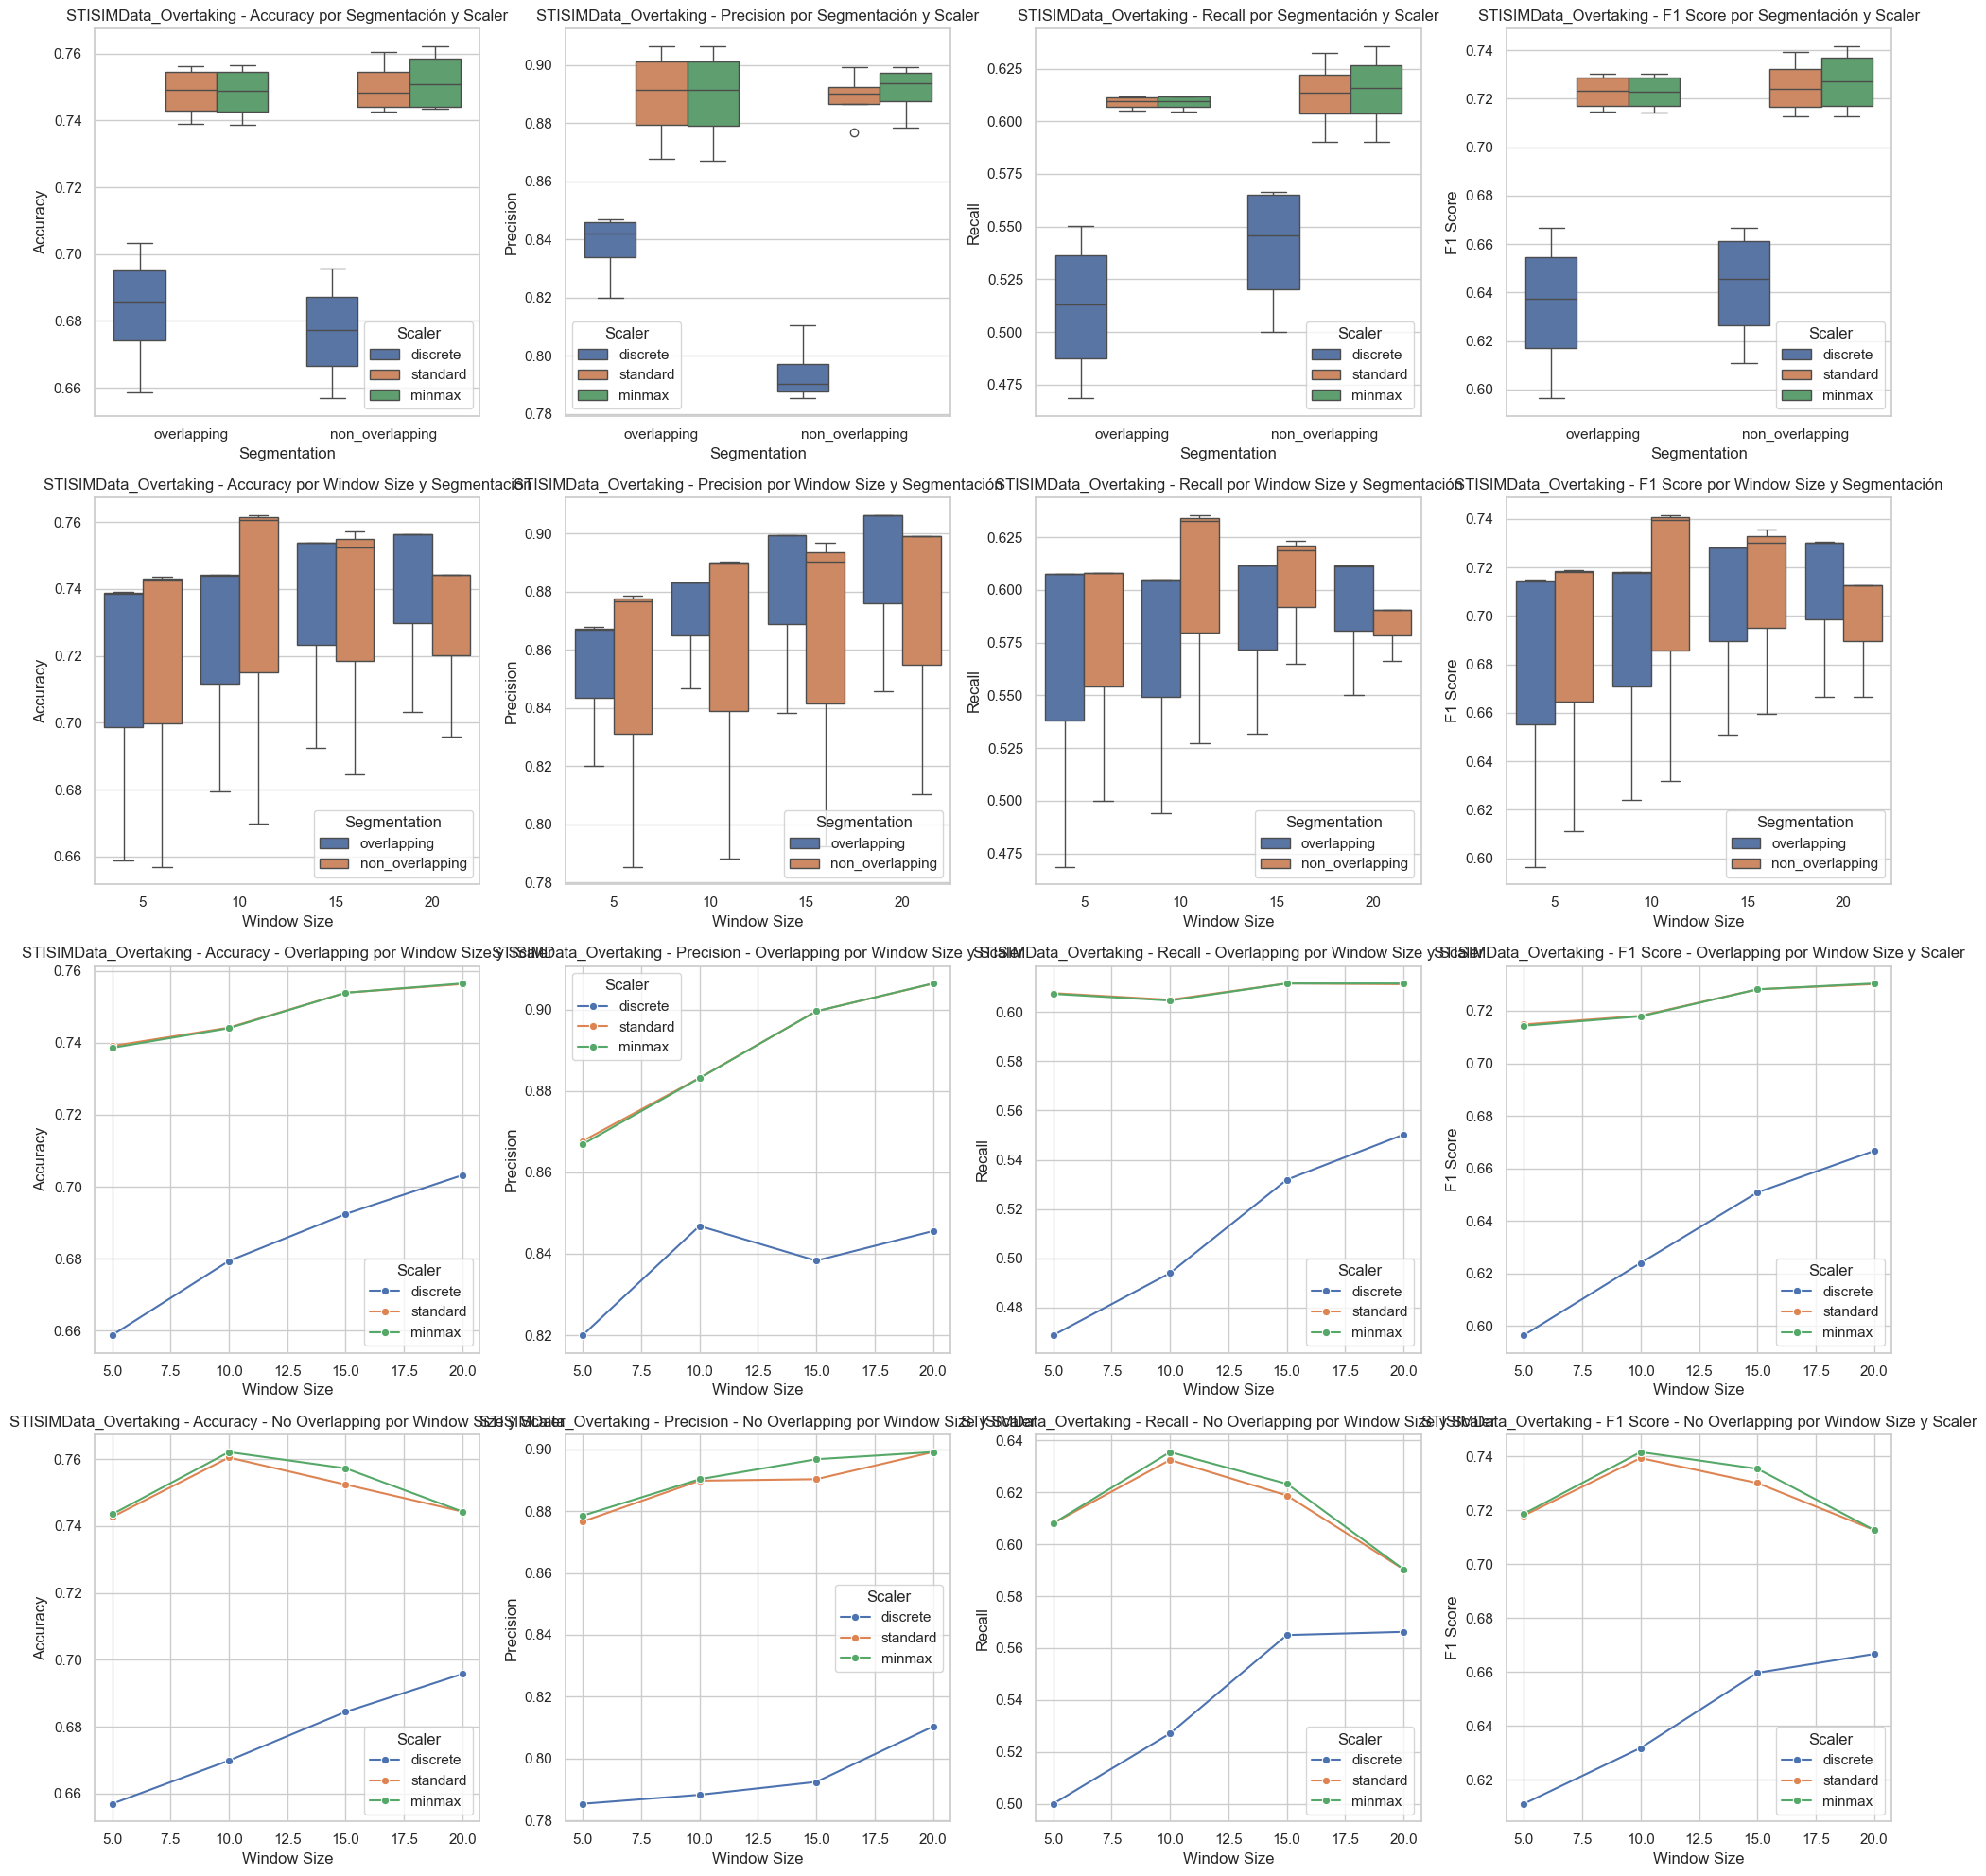

In [6]:
fig, axes = plt.subplots(4, len(metrics), figsize=(20, 20))

for j, metric in enumerate(metrics):
    sns.boxplot(x='Segmentation', y=metric, hue='Scaler', data=maneuver_data, ax=axes[0, j])
    axes[0, j].set_title(f"{maneuver} - {metric} por Segmentación y Scaler")
    axes[0, j].set_xlabel("Segmentation")
    axes[0, j].set_ylabel(metric)
    axes[0, j].legend(title='Scaler')

    sns.boxplot(x='Window Size', y=metric, hue='Segmentation', data=maneuver_data, ax=axes[1, j])
    axes[1, j].set_title(f"{maneuver} - {metric} por Window Size y Segmentación")
    axes[1, j].set_xlabel("Window Size")
    axes[1, j].set_ylabel(metric)
    axes[1, j].legend(title='Segmentation')
    
    seg_man_data = maneuver_data[maneuver_data['Segmentation'] == 'overlapping']
    sns.lineplot(x='Window Size', y=metric, hue='Scaler', data=seg_man_data, marker='o', ax=axes[2, j])
    axes[2, j].set_title(f"{maneuver} - {metric} - Overlapping por Window Size y Scaler")
    axes[2, j].set_xlabel("Window Size")
    axes[2, j].set_ylabel(metric)
    axes[2, j].legend(title='Scaler')

    seg_man_data = maneuver_data[maneuver_data['Segmentation'] == 'non_overlapping']
    sns.lineplot(x='Window Size', y=metric, hue='Scaler', data=seg_man_data, marker='o', ax=axes[3, j])
    axes[3, j].set_title(f"{maneuver} - {metric} - No Overlapping por Window Size y Scaler")
    axes[3, j].set_xlabel("Window Size")
    axes[3, j].set_ylabel(metric)
    axes[3, j].legend(title='Scaler')

plt.tight_layout()
plt.show()

Comparando las ventanas con y sin solapamiento, se aprecia que los modelos con ventanas sin solapamiento logran mejores resultados en términos de precisión y *f1-score*, lo que indica que los datos solapados pueden inducir overfitting. Sin embargo, en los conjuntos con discretización, las ventanas con solapamiento ofrecen mejores métricas debido a la generalización ya implícita en la discretización.

Las gráficas de las dos últimas filas muestran una clara superioridad en los modelos con datos escalados, sin importar el tamaño de la ventana o el solapamiento. También se confirma que un mayor tamaño de ventana mejora el rendimiento del modelo al proporcionar más contexto para la clasificación.

En conclusión, el mejor modelo para predecir la acción de adelantamiento se obtiene con datos escalados mediante un estándar sin solapamiento y un tamaño de ventana de 10, logrando un *f1-score* de $0.74$. Para ventanas con solapamiento y tamaño de ventana de 20, el mejor modelo alcanza un *f1-score* de $0.73$ con escalado de mínimos y máximos.

## 3.3. Stopping

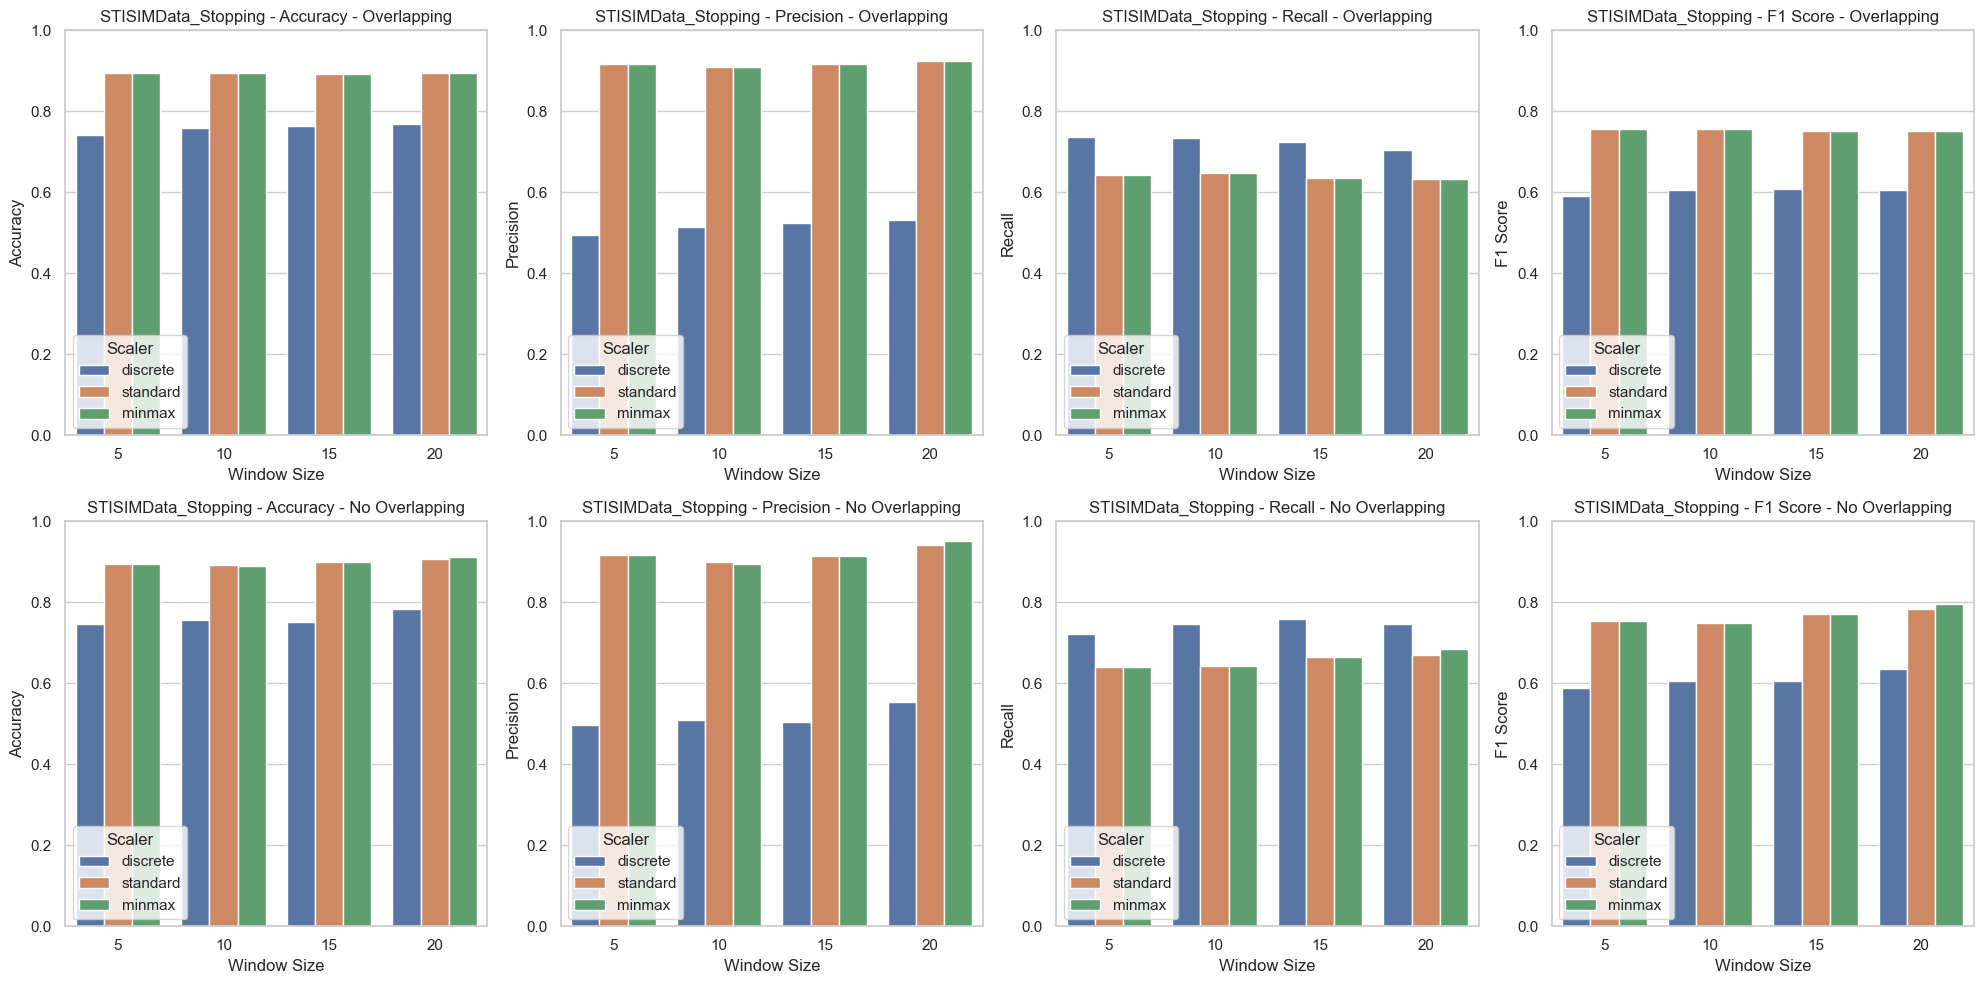

In [7]:
# Crear gráficos para cada maniobra con subgráficas por métrica
maneuver = 'STISIMData_Stopping'
fig, axes = plt.subplots(2, len(metrics), figsize=(20, 10))
maneuver_data = df[df['Maneuver'] == maneuver]

seg_man_data = maneuver_data[maneuver_data['Segmentation'] == 'overlapping']
for j, metric in enumerate(metrics):
    sns.barplot(x='Window Size', y=metric, hue='Scaler', data=seg_man_data, ax=axes[0, j])
    axes[0, j].set_title(f"{maneuver} - {metric} - Overlapping")
    axes[0, j].set_xlabel("Window Size")
    axes[0, j].set_ylabel(metric)
    axes[0, j].legend(title='Scaler', loc='lower left')
    axes[0, j].set_ylim(0, 1)

seg_man_data = maneuver_data[maneuver_data['Segmentation'] == 'non_overlapping']
for j, metric in enumerate(metrics):
    sns.barplot(x='Window Size', y=metric, hue='Scaler', data=seg_man_data, ax=axes[1, j])
    axes[1, j].set_title(f"{maneuver} - {metric} - No Overlapping")
    axes[1, j].set_xlabel("Window Size")
    axes[1, j].set_ylabel(metric)
    axes[1, j].legend(title='Scaler', loc='lower left')
    axes[1, j].set_ylim(0, 1)

plt.tight_layout()
plt.show()

Los gráficos reflejan un patrón similar a las maniobras anteriores. El escalado estándar y de mínimos y máximos presentan un mejor rendimiento en todas las métricas en comparación con la discretización, donde la pérdida de información puede ser significativa. El modelo con mejor rendimiento, según *f1-score*, es aquel con un escalado estándar.

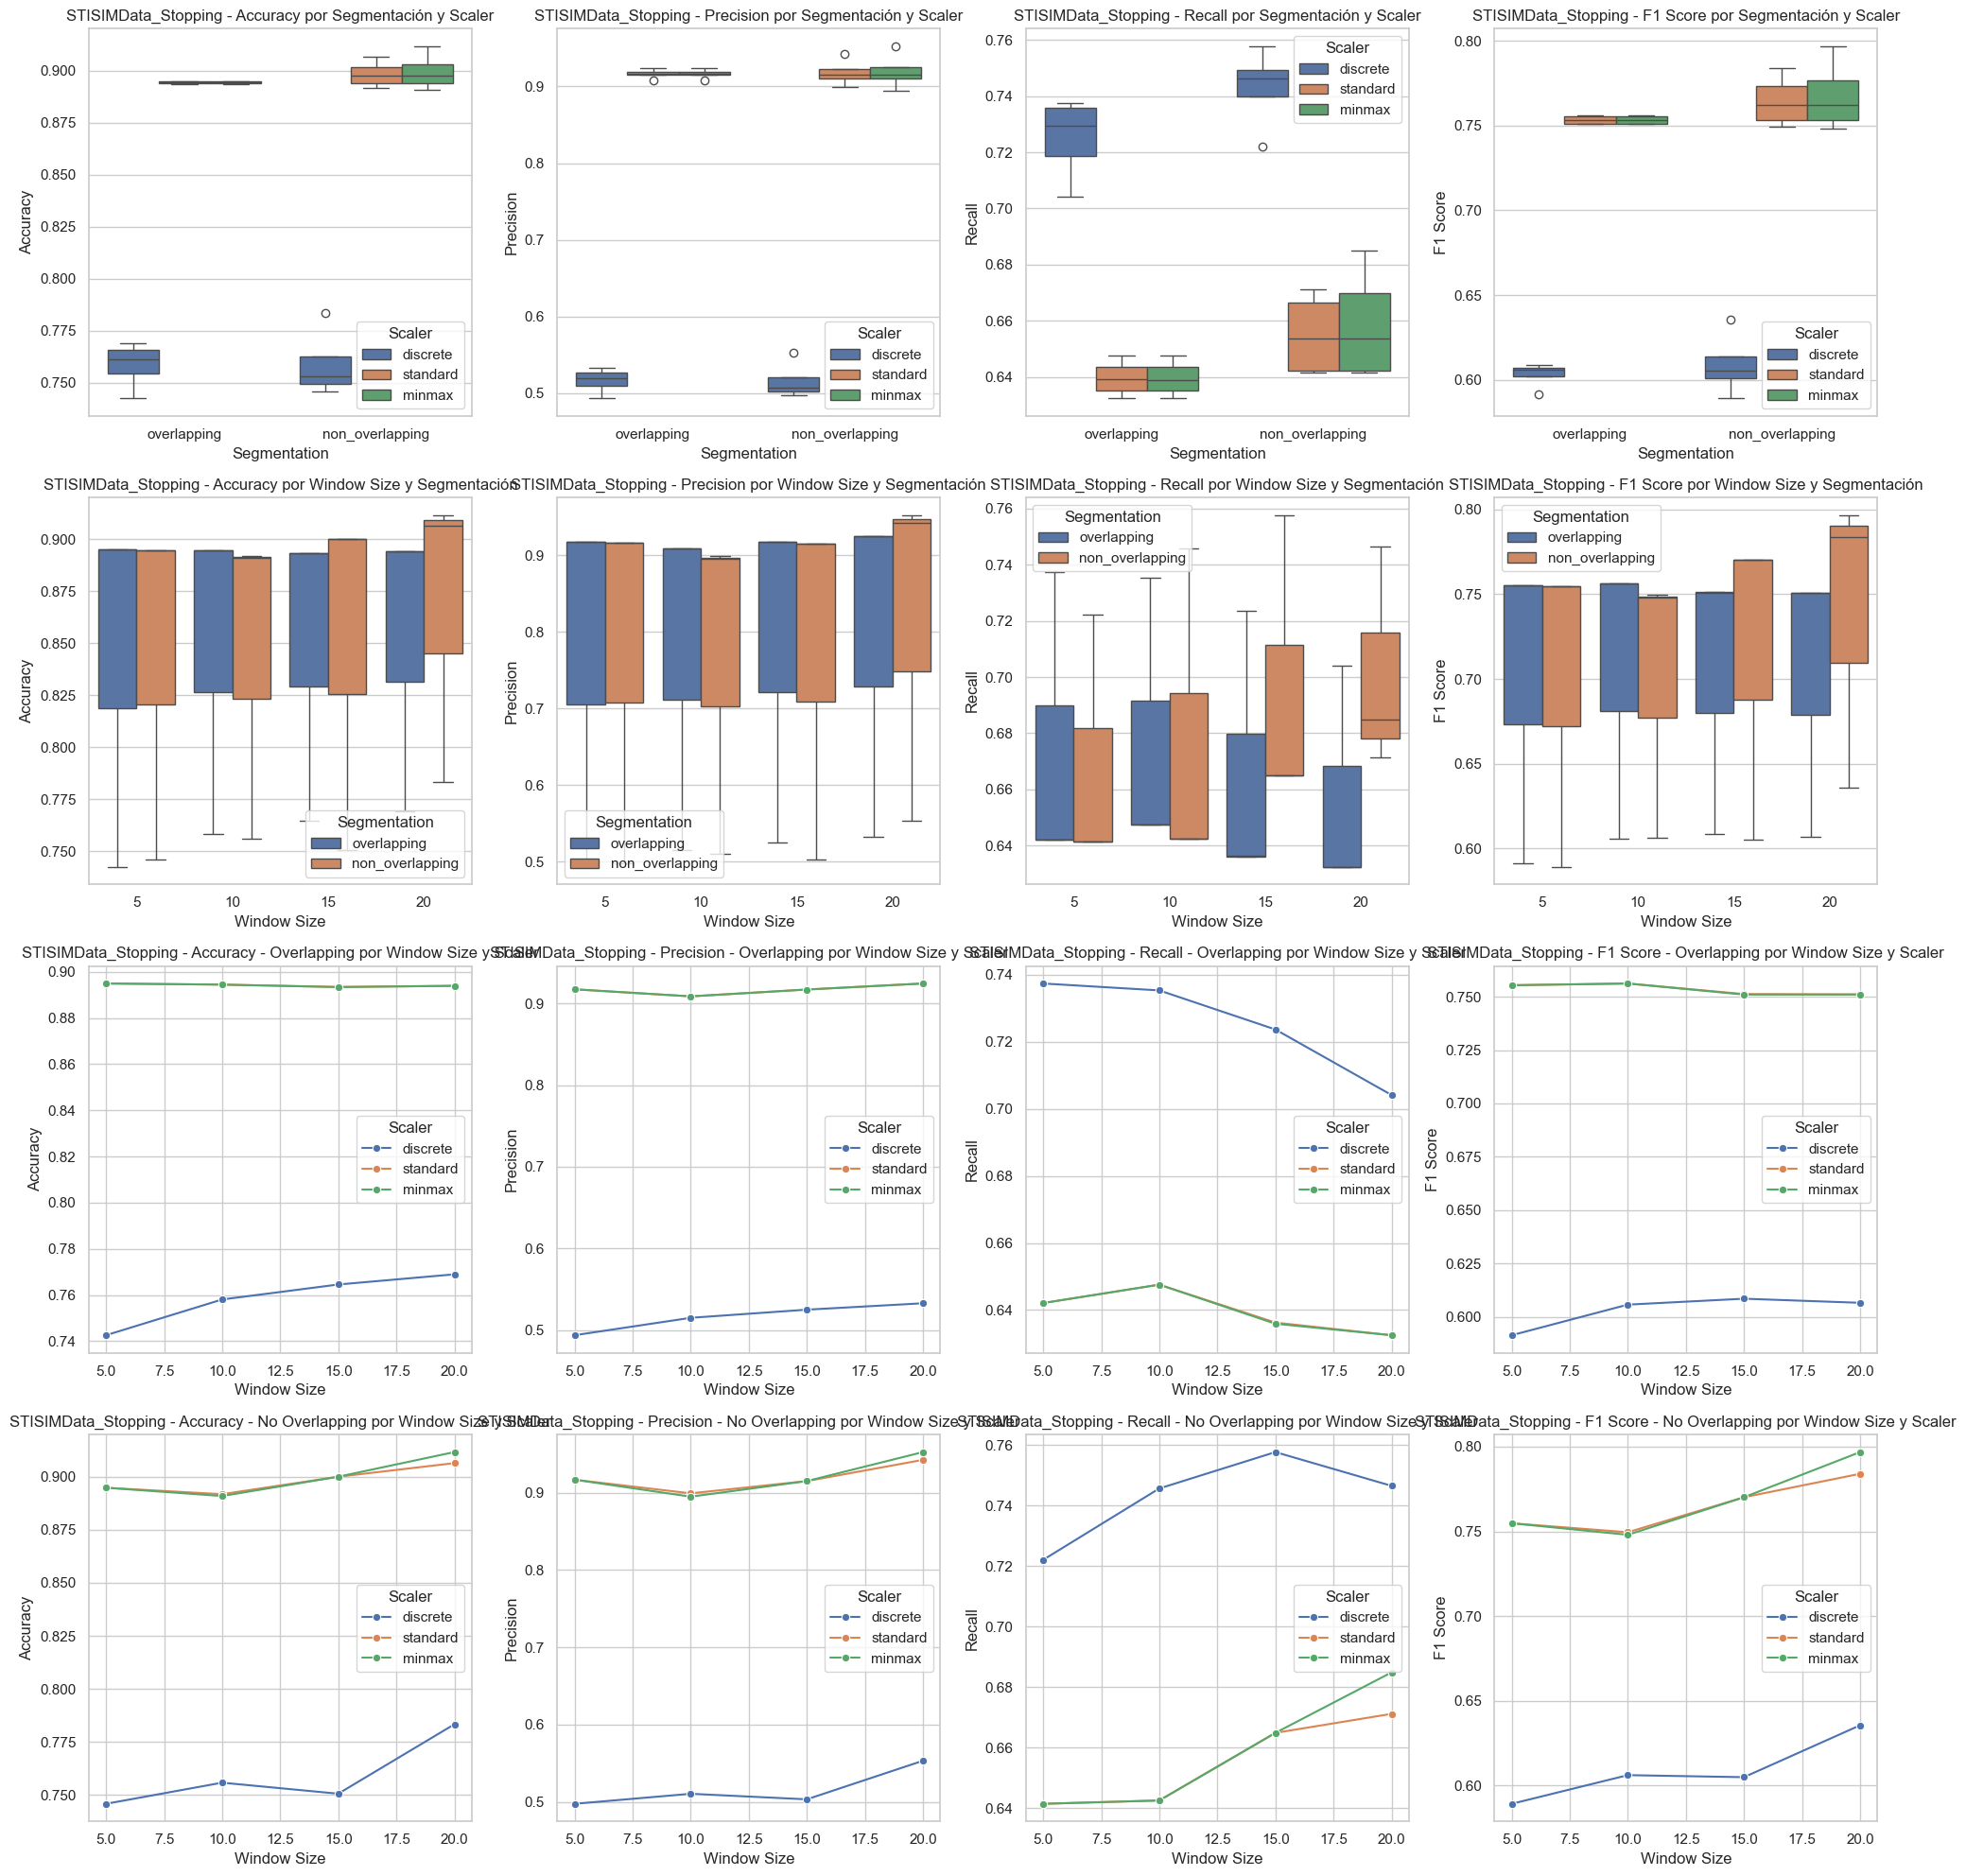

In [8]:
fig, axes = plt.subplots(4, len(metrics), figsize=(20, 20))

for j, metric in enumerate(metrics):
    sns.boxplot(x='Segmentation', y=metric, hue='Scaler', data=maneuver_data, ax=axes[0, j])
    axes[0, j].set_title(f"{maneuver} - {metric} por Segmentación y Scaler")
    axes[0, j].set_xlabel("Segmentation")
    axes[0, j].set_ylabel(metric)
    axes[0, j].legend(title='Scaler')

    sns.boxplot(x='Window Size', y=metric, hue='Segmentation', data=maneuver_data, ax=axes[1, j])
    axes[1, j].set_title(f"{maneuver} - {metric} por Window Size y Segmentación")
    axes[1, j].set_xlabel("Window Size")
    axes[1, j].set_ylabel(metric)
    axes[1, j].legend(title='Segmentation')
    
    seg_man_data = maneuver_data[maneuver_data['Segmentation'] == 'overlapping']
    sns.lineplot(x='Window Size', y=metric, hue='Scaler', data=seg_man_data, marker='o', ax=axes[2, j])
    axes[2, j].set_title(f"{maneuver} - {metric} - Overlapping por Window Size y Scaler")
    axes[2, j].set_xlabel("Window Size")
    axes[2, j].set_ylabel(metric)
    axes[2, j].legend(title='Scaler')

    seg_man_data = maneuver_data[maneuver_data['Segmentation'] == 'non_overlapping']
    sns.lineplot(x='Window Size', y=metric, hue='Scaler', data=seg_man_data, marker='o', ax=axes[3, j])
    axes[3, j].set_title(f"{maneuver} - {metric} - No Overlapping por Window Size y Scaler")
    axes[3, j].set_xlabel("Window Size")
    axes[3, j].set_ylabel(metric)
    axes[3, j].legend(title='Scaler')

plt.tight_layout()
plt.show()

En la comparación entre ventanas con y sin solapamiento, se evidencia nuevamente que los modelos con ventanas sin solapamiento logran una mejor generalización, especialmente cuando se utilizan escalados adecuados. Sin embargo, en el caso de discretización, el rendimiento mejora con solapamiento debido a la reducción de la variabilidad entre los segmentos.

Las últimas filas de gráficas refuerzan la idea de que los datos escalados proporcionan mejores resultados en cualquier configuración. También se observa que el rendimiento mejora con el aumento del tamaño de la ventana.

Finalmente, el mejor modelo para la predicción de la acción de detención es aquel con un escalado estándar sin solapamiento y una ventana de tamaño 20, obteniendo un *f1-score* de $0.79$. En el caso de las ventanas con solapamiento de ventana de tamaño 10, el mejor modelo alcanza un *f1-score* de $0.75$, con un escalado estándar.

## 3.4. Turnings

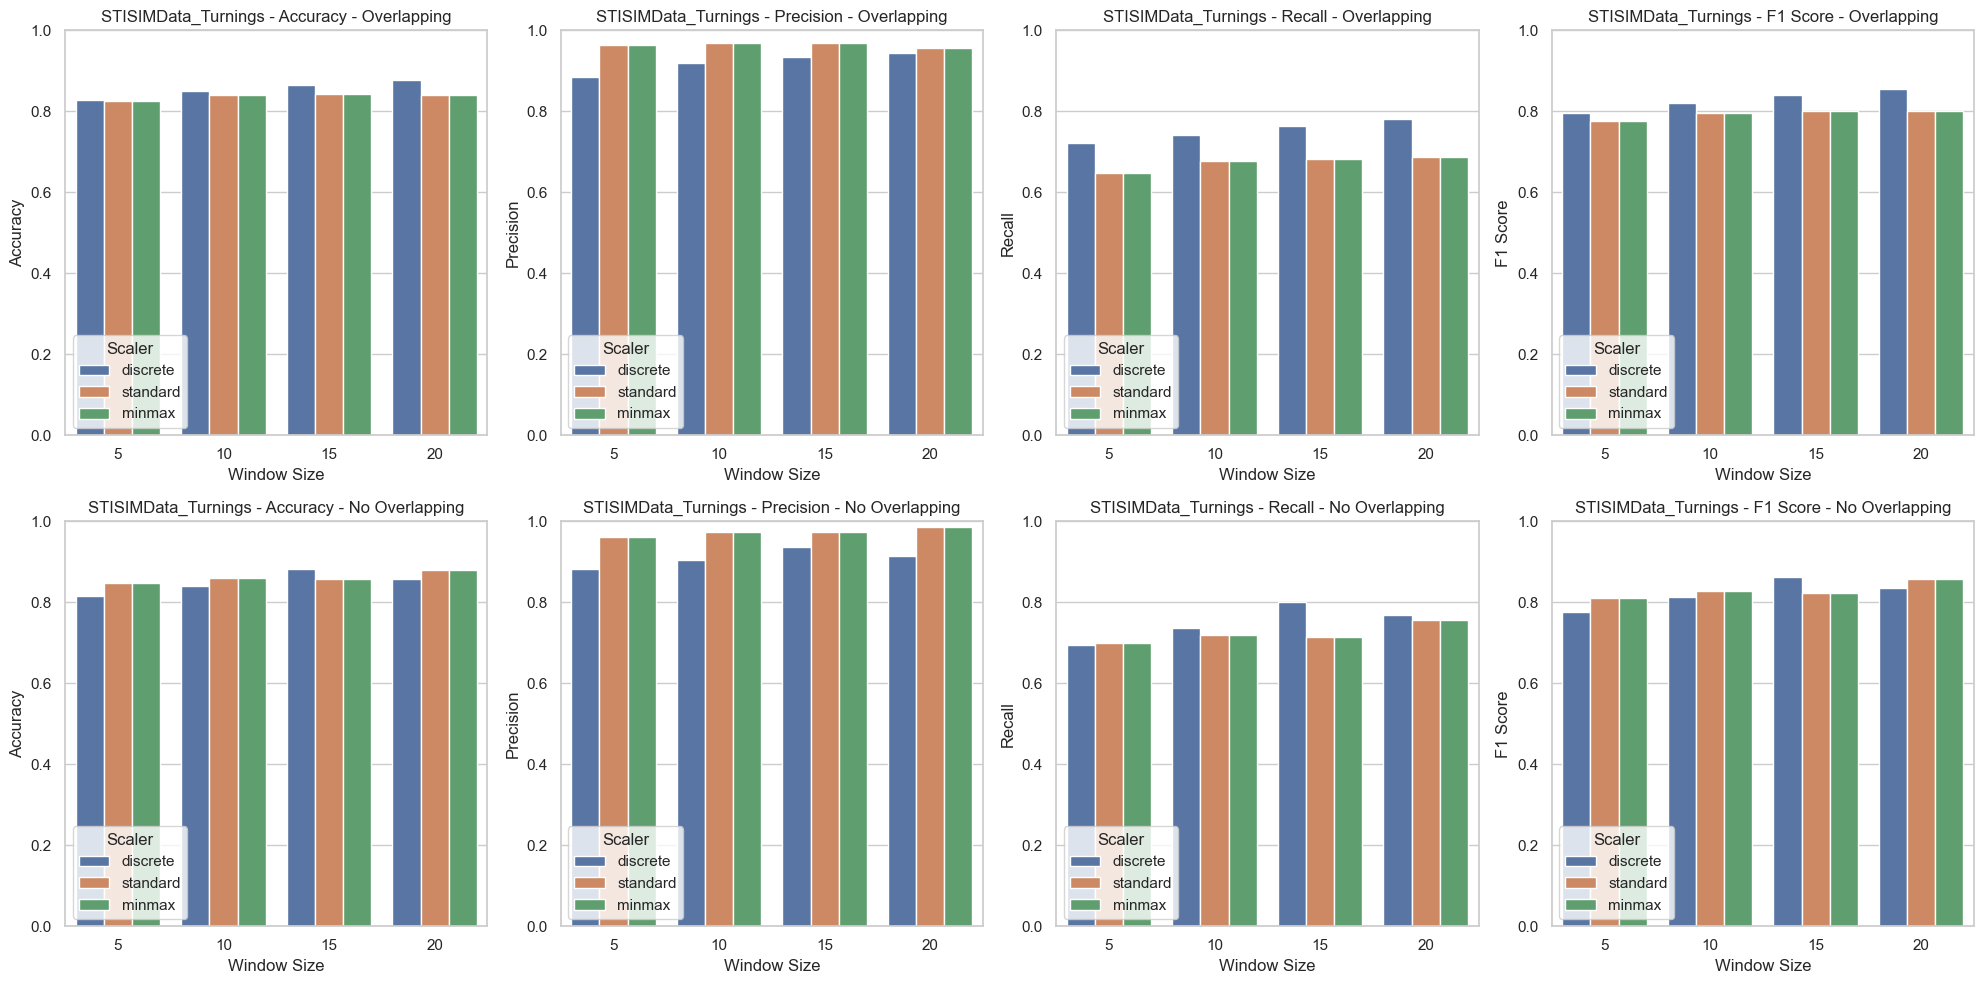

In [9]:
# Crear gráficos para cada maniobra con subgráficas por métrica
maneuver = 'STISIMData_Turnings'
fig, axes = plt.subplots(2, len(metrics), figsize=(20, 10))
maneuver_data = df[df['Maneuver'] == maneuver]

seg_man_data = maneuver_data[maneuver_data['Segmentation'] == 'overlapping']
for j, metric in enumerate(metrics):
    sns.barplot(x='Window Size', y=metric, hue='Scaler', data=seg_man_data, ax=axes[0, j])
    axes[0, j].set_title(f"{maneuver} - {metric} - Overlapping")
    axes[0, j].set_xlabel("Window Size")
    axes[0, j].set_ylabel(metric)
    axes[0, j].legend(title='Scaler', loc='lower left')
    axes[0, j].set_ylim(0, 1)

seg_man_data = maneuver_data[maneuver_data['Segmentation'] == 'non_overlapping']
for j, metric in enumerate(metrics):
    sns.barplot(x='Window Size', y=metric, hue='Scaler', data=seg_man_data, ax=axes[1, j])
    axes[1, j].set_title(f"{maneuver} - {metric} - No Overlapping")
    axes[1, j].set_xlabel("Window Size")
    axes[1, j].set_ylabel(metric)
    axes[1, j].legend(title='Scaler', loc='lower left')
    axes[1, j].set_ylim(0, 1)

plt.tight_layout()
plt.show()

La fila superior de gráficos muestra los resultados obtenidos con ventanas deslizantes con solapamiento, mientras que la fila inferior presenta los resultados de las ventanas sin solapamiento. En las cuatro métricas analizadas (*accuracy, precision, recall y f1-score*), se observa un mejor desempeño en aquellos modelos que utilizan la discretización de los datos y máximos en comparación con los datos escalados, con diferencias de hasta 15 puntos en algunos casos.

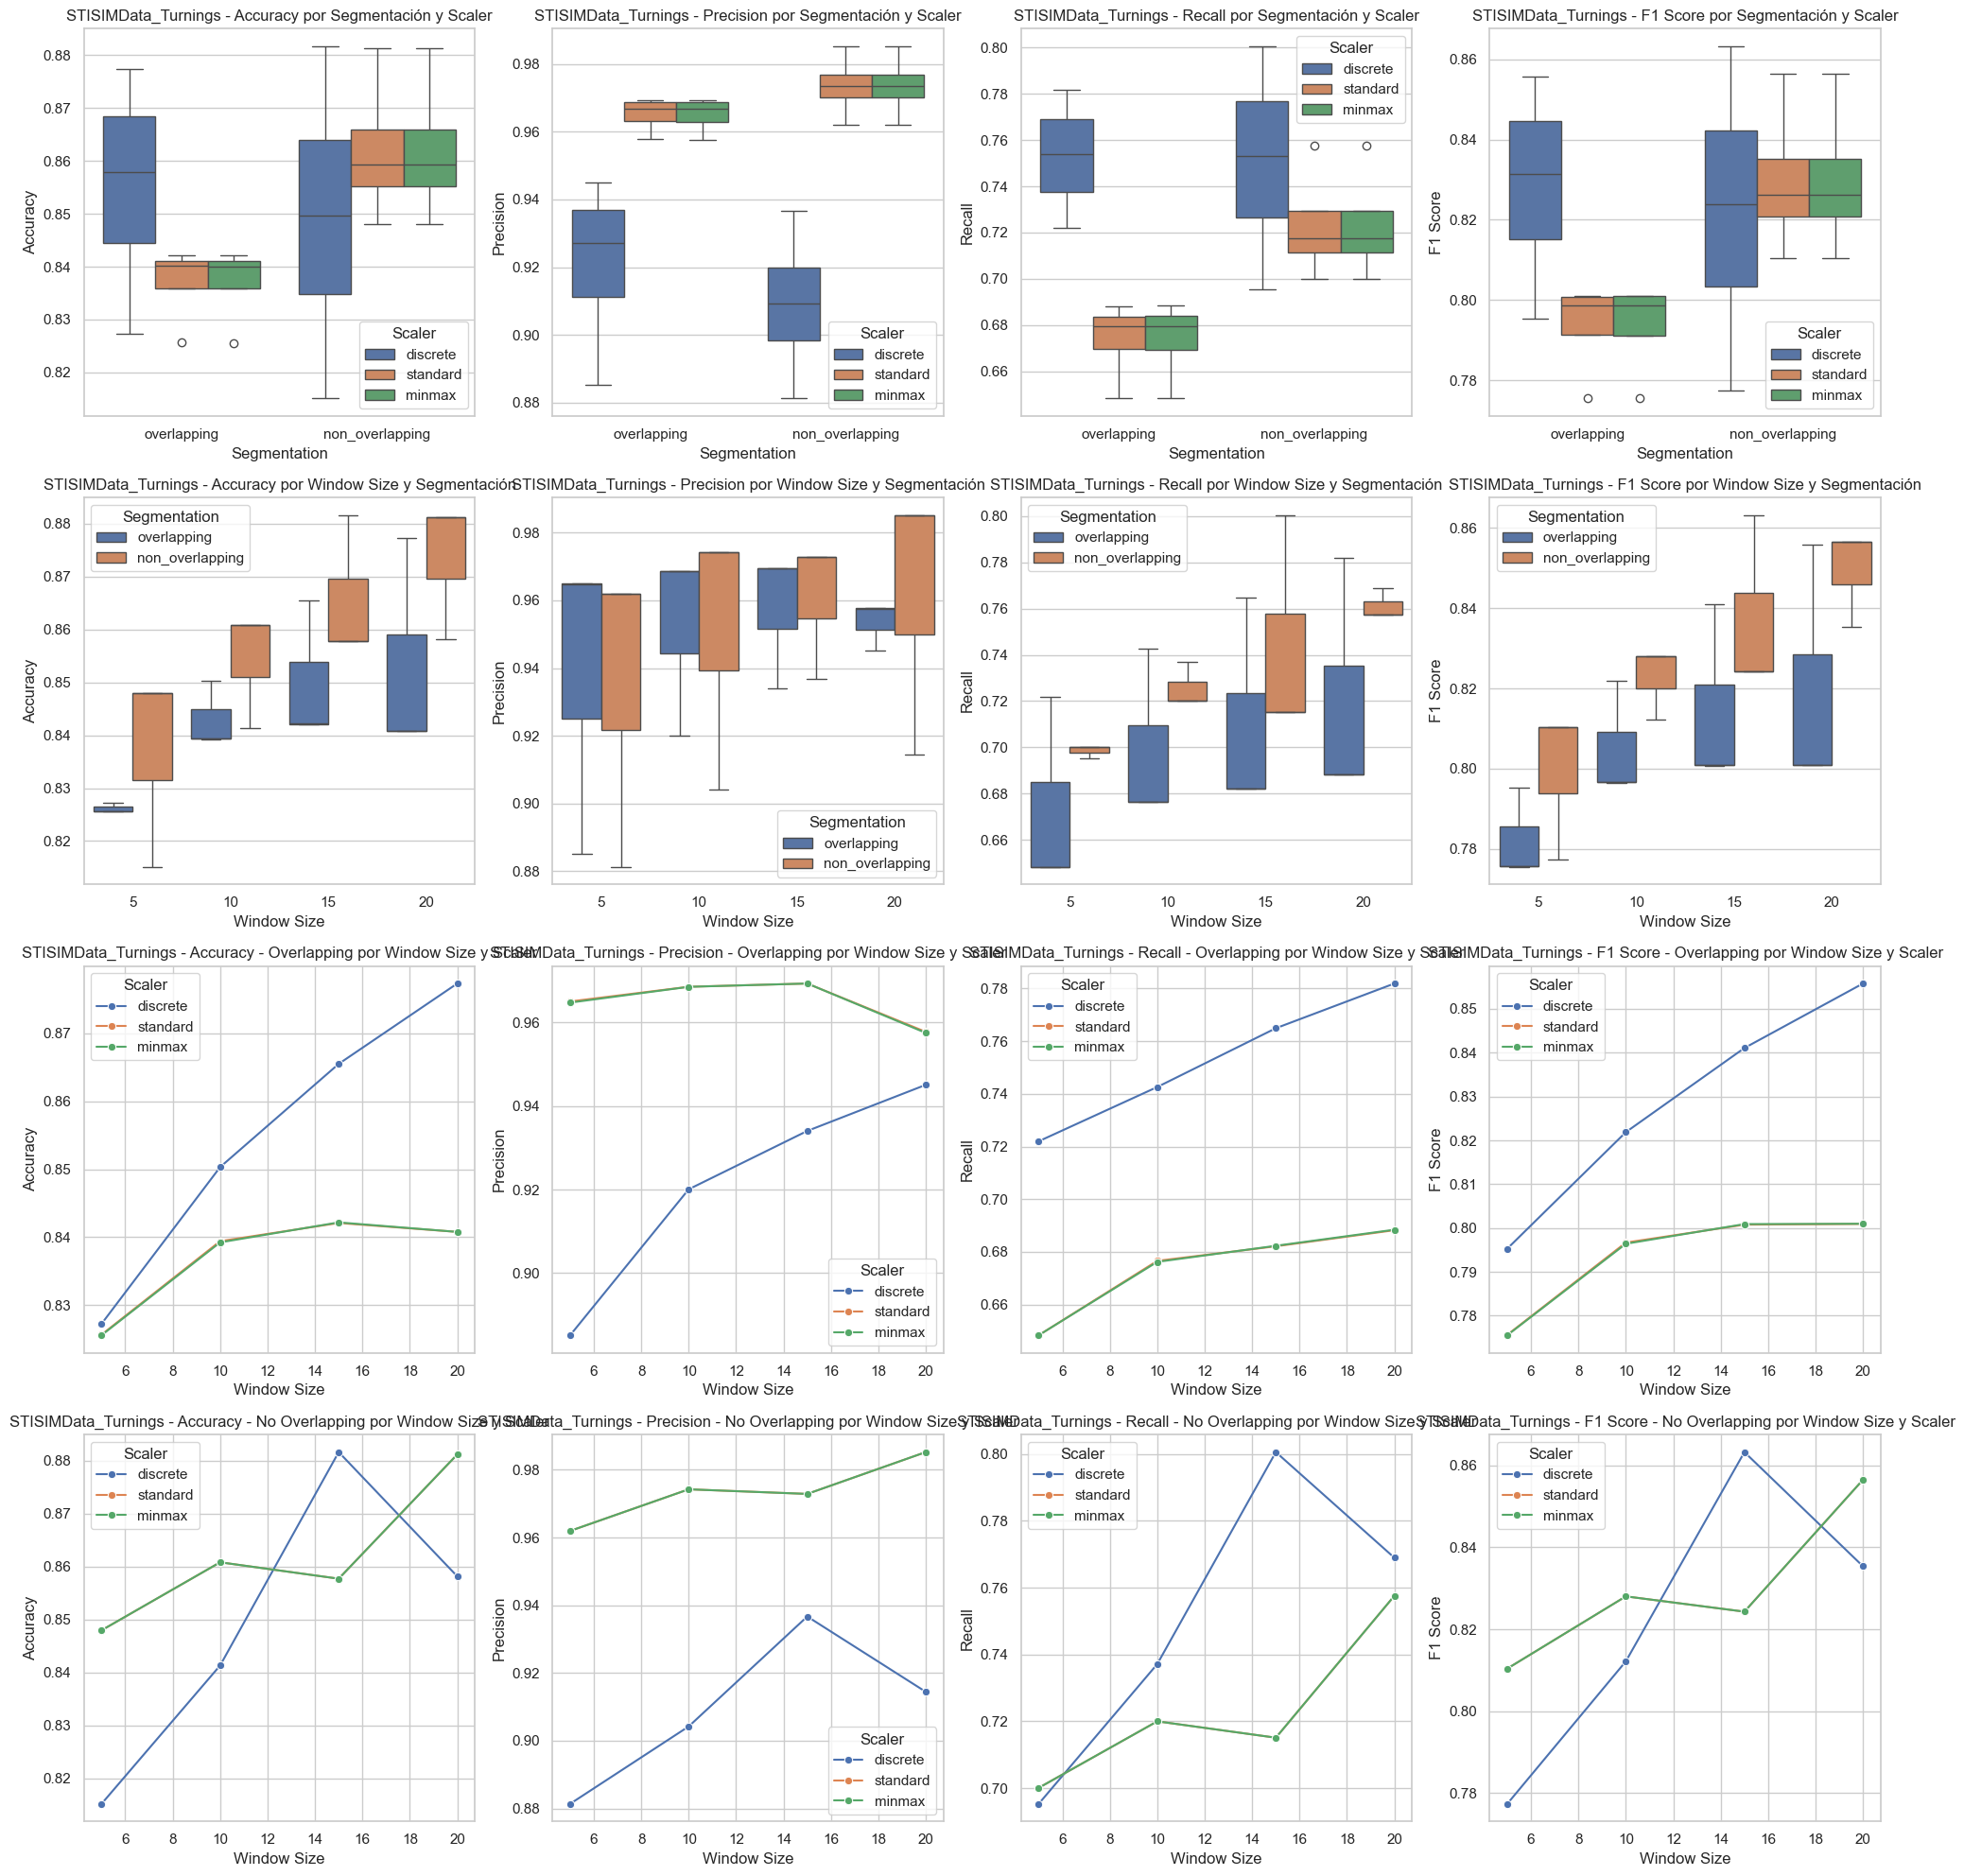

In [10]:
fig, axes = plt.subplots(4, len(metrics), figsize=(20, 20))

for j, metric in enumerate(metrics):
    sns.boxplot(x='Segmentation', y=metric, hue='Scaler', data=maneuver_data, ax=axes[0, j])
    axes[0, j].set_title(f"{maneuver} - {metric} por Segmentación y Scaler")
    axes[0, j].set_xlabel("Segmentation")
    axes[0, j].set_ylabel(metric)
    axes[0, j].legend(title='Scaler')

    sns.boxplot(x='Window Size', y=metric, hue='Segmentation', data=maneuver_data, ax=axes[1, j])
    axes[1, j].set_title(f"{maneuver} - {metric} por Window Size y Segmentación")
    axes[1, j].set_xlabel("Window Size")
    axes[1, j].set_ylabel(metric)
    axes[1, j].legend(title='Segmentation')
    
    seg_man_data = maneuver_data[maneuver_data['Segmentation'] == 'overlapping']
    sns.lineplot(x='Window Size', y=metric, hue='Scaler', data=seg_man_data, marker='o', ax=axes[2, j])
    axes[2, j].set_title(f"{maneuver} - {metric} - Overlapping por Window Size y Scaler")
    axes[2, j].set_xlabel("Window Size")
    axes[2, j].set_ylabel(metric)
    axes[2, j].legend(title='Scaler')

    seg_man_data = maneuver_data[maneuver_data['Segmentation'] == 'non_overlapping']
    sns.lineplot(x='Window Size', y=metric, hue='Scaler', data=seg_man_data, marker='o', ax=axes[3, j])
    axes[3, j].set_title(f"{maneuver} - {metric} - No Overlapping por Window Size y Scaler")
    axes[3, j].set_xlabel("Window Size")
    axes[3, j].set_ylabel(metric)
    axes[3, j].legend(title='Scaler')

plt.tight_layout()
plt.show()

Al comparar los modelos con ventanas con y sin solapamiento, se nota que las versiones sin solapamiento logran un mejor desempeño. Esto sugiere que el solapamiento puede inducir *overfitting* en los datos, disminuyendo la capacidad de generalización del modelo. Sin embargo, en los conjuntos con datos discretizados, ocurre lo contrario: una generalización de los datos aporta un mayor rendimiento en los modelos.

En los gráficos de las dos últimas filas, se observa que los datos discretizados continúan teniendo un rendimiento superior a los escalados, sin importar el tamaño de ventana o la segmentación utilizada. Además, se puede notar que un mayor tamaño de ventana contribuye a mejorar los resultados del modelo, proporcionando más información relevante.

Como conclusión, el mejor modelo para la acción de Turnings es aquel que utiliza discretización de los datos tanto para ventanas solapadas como para aquellas que no están solapadas, logrando un *f1-score* de aproximadamente $0.86$. La tendencia general indica que el preprocesamiento de los datos y el escalado adecuado son factores determinantes para obtener buenos resultados en la predicción de esta acción.

## 3.5. U-Turnings

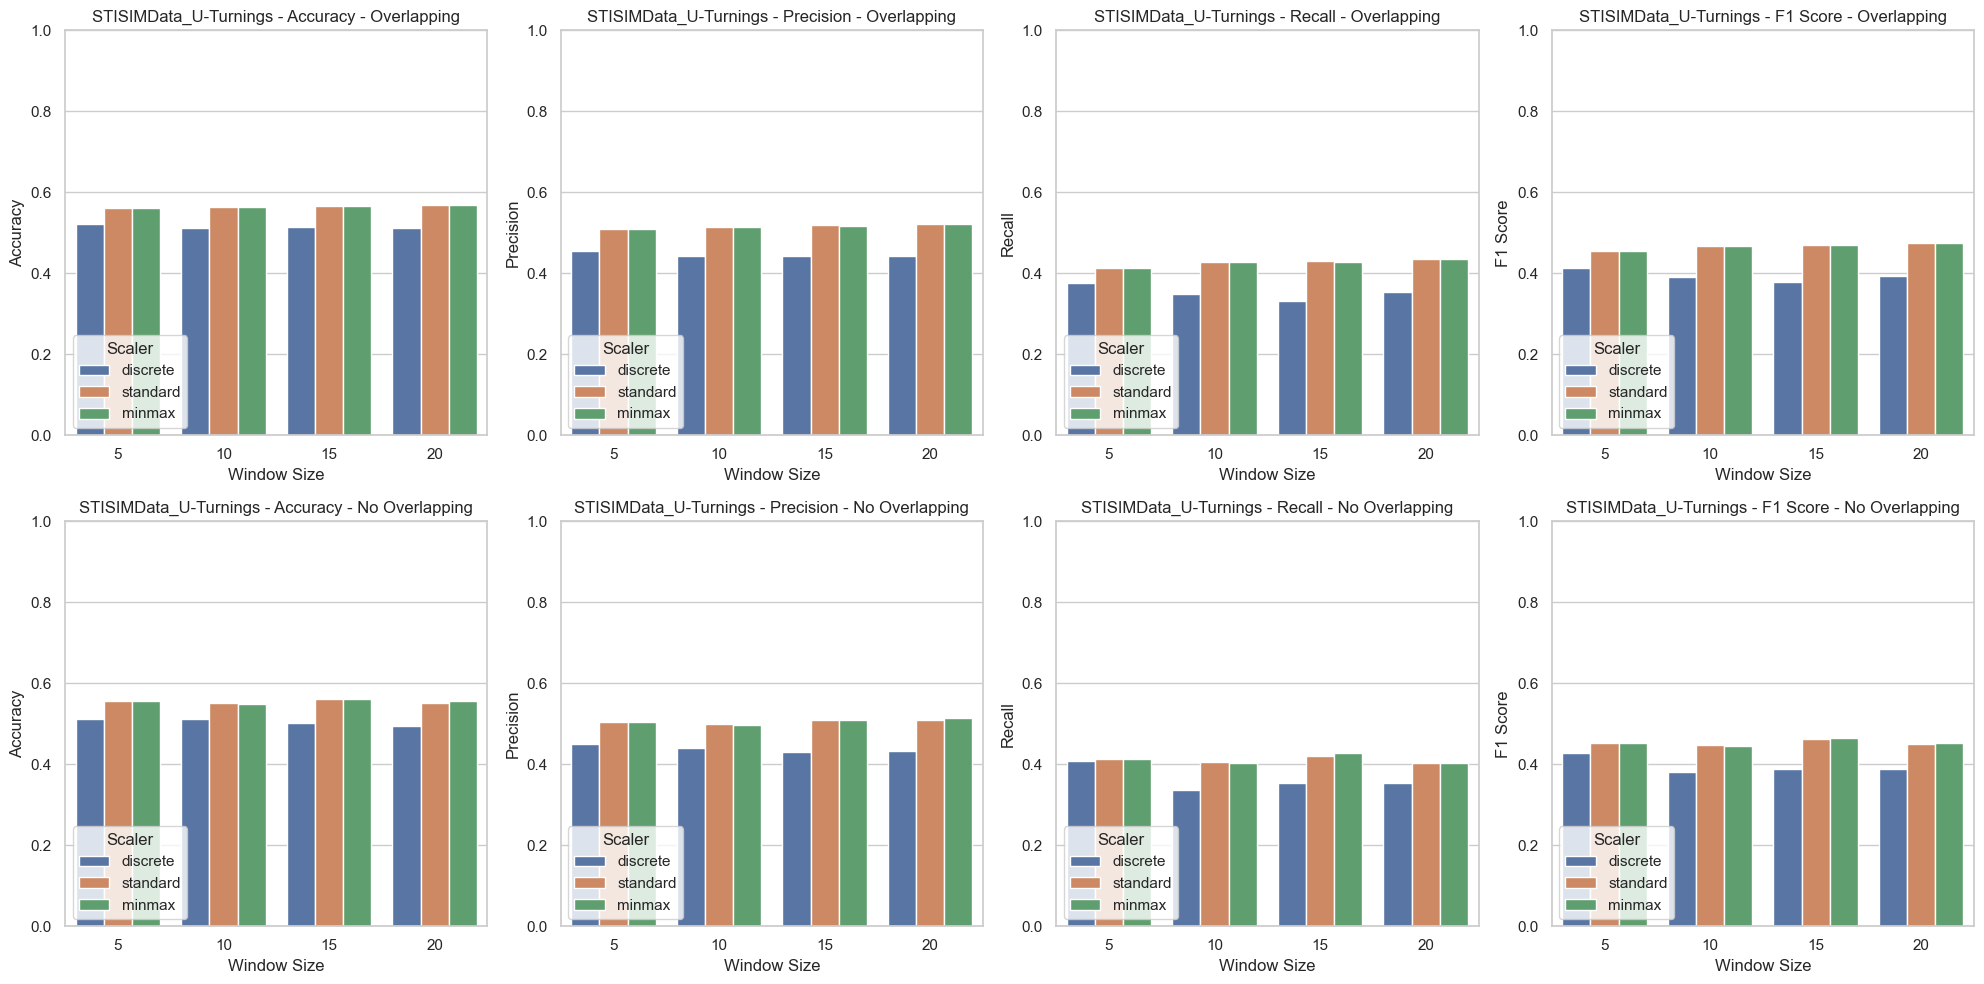

In [11]:
# Crear gráficos para cada maniobra con subgráficas por métrica
maneuver = 'STISIMData_U-Turnings'
fig, axes = plt.subplots(2, len(metrics), figsize=(20, 10))
maneuver_data = df[df['Maneuver'] == maneuver]

seg_man_data = maneuver_data[maneuver_data['Segmentation'] == 'overlapping']
for j, metric in enumerate(metrics):
    sns.barplot(x='Window Size', y=metric, hue='Scaler', data=seg_man_data, ax=axes[0, j])
    axes[0, j].set_title(f"{maneuver} - {metric} - Overlapping")
    axes[0, j].set_xlabel("Window Size")
    axes[0, j].set_ylabel(metric)
    axes[0, j].legend(title='Scaler', loc='lower left')
    axes[0, j].set_ylim(0, 1)

seg_man_data = maneuver_data[maneuver_data['Segmentation'] == 'non_overlapping']
for j, metric in enumerate(metrics):
    sns.barplot(x='Window Size', y=metric, hue='Scaler', data=seg_man_data, ax=axes[1, j])
    axes[1, j].set_title(f"{maneuver} - {metric} - No Overlapping")
    axes[1, j].set_xlabel("Window Size")
    axes[1, j].set_ylabel(metric)
    axes[1, j].legend(title='Scaler', loc='lower left')
    axes[1, j].set_ylim(0, 1)

plt.tight_layout()
plt.show()

La fila superior de gráficos presenta los resultados con ventanas deslizantes con solapamiento, mientras que la fila inferior muestra los resultados sin solapamiento. En las métricas de *accuracy, precision, recall y f1-score*, se observa un mejor rendimiento en los modelos que emplean un escalado estándar o de mínimos y máximos, mientras que la discretización genera una pérdida significativa de información.

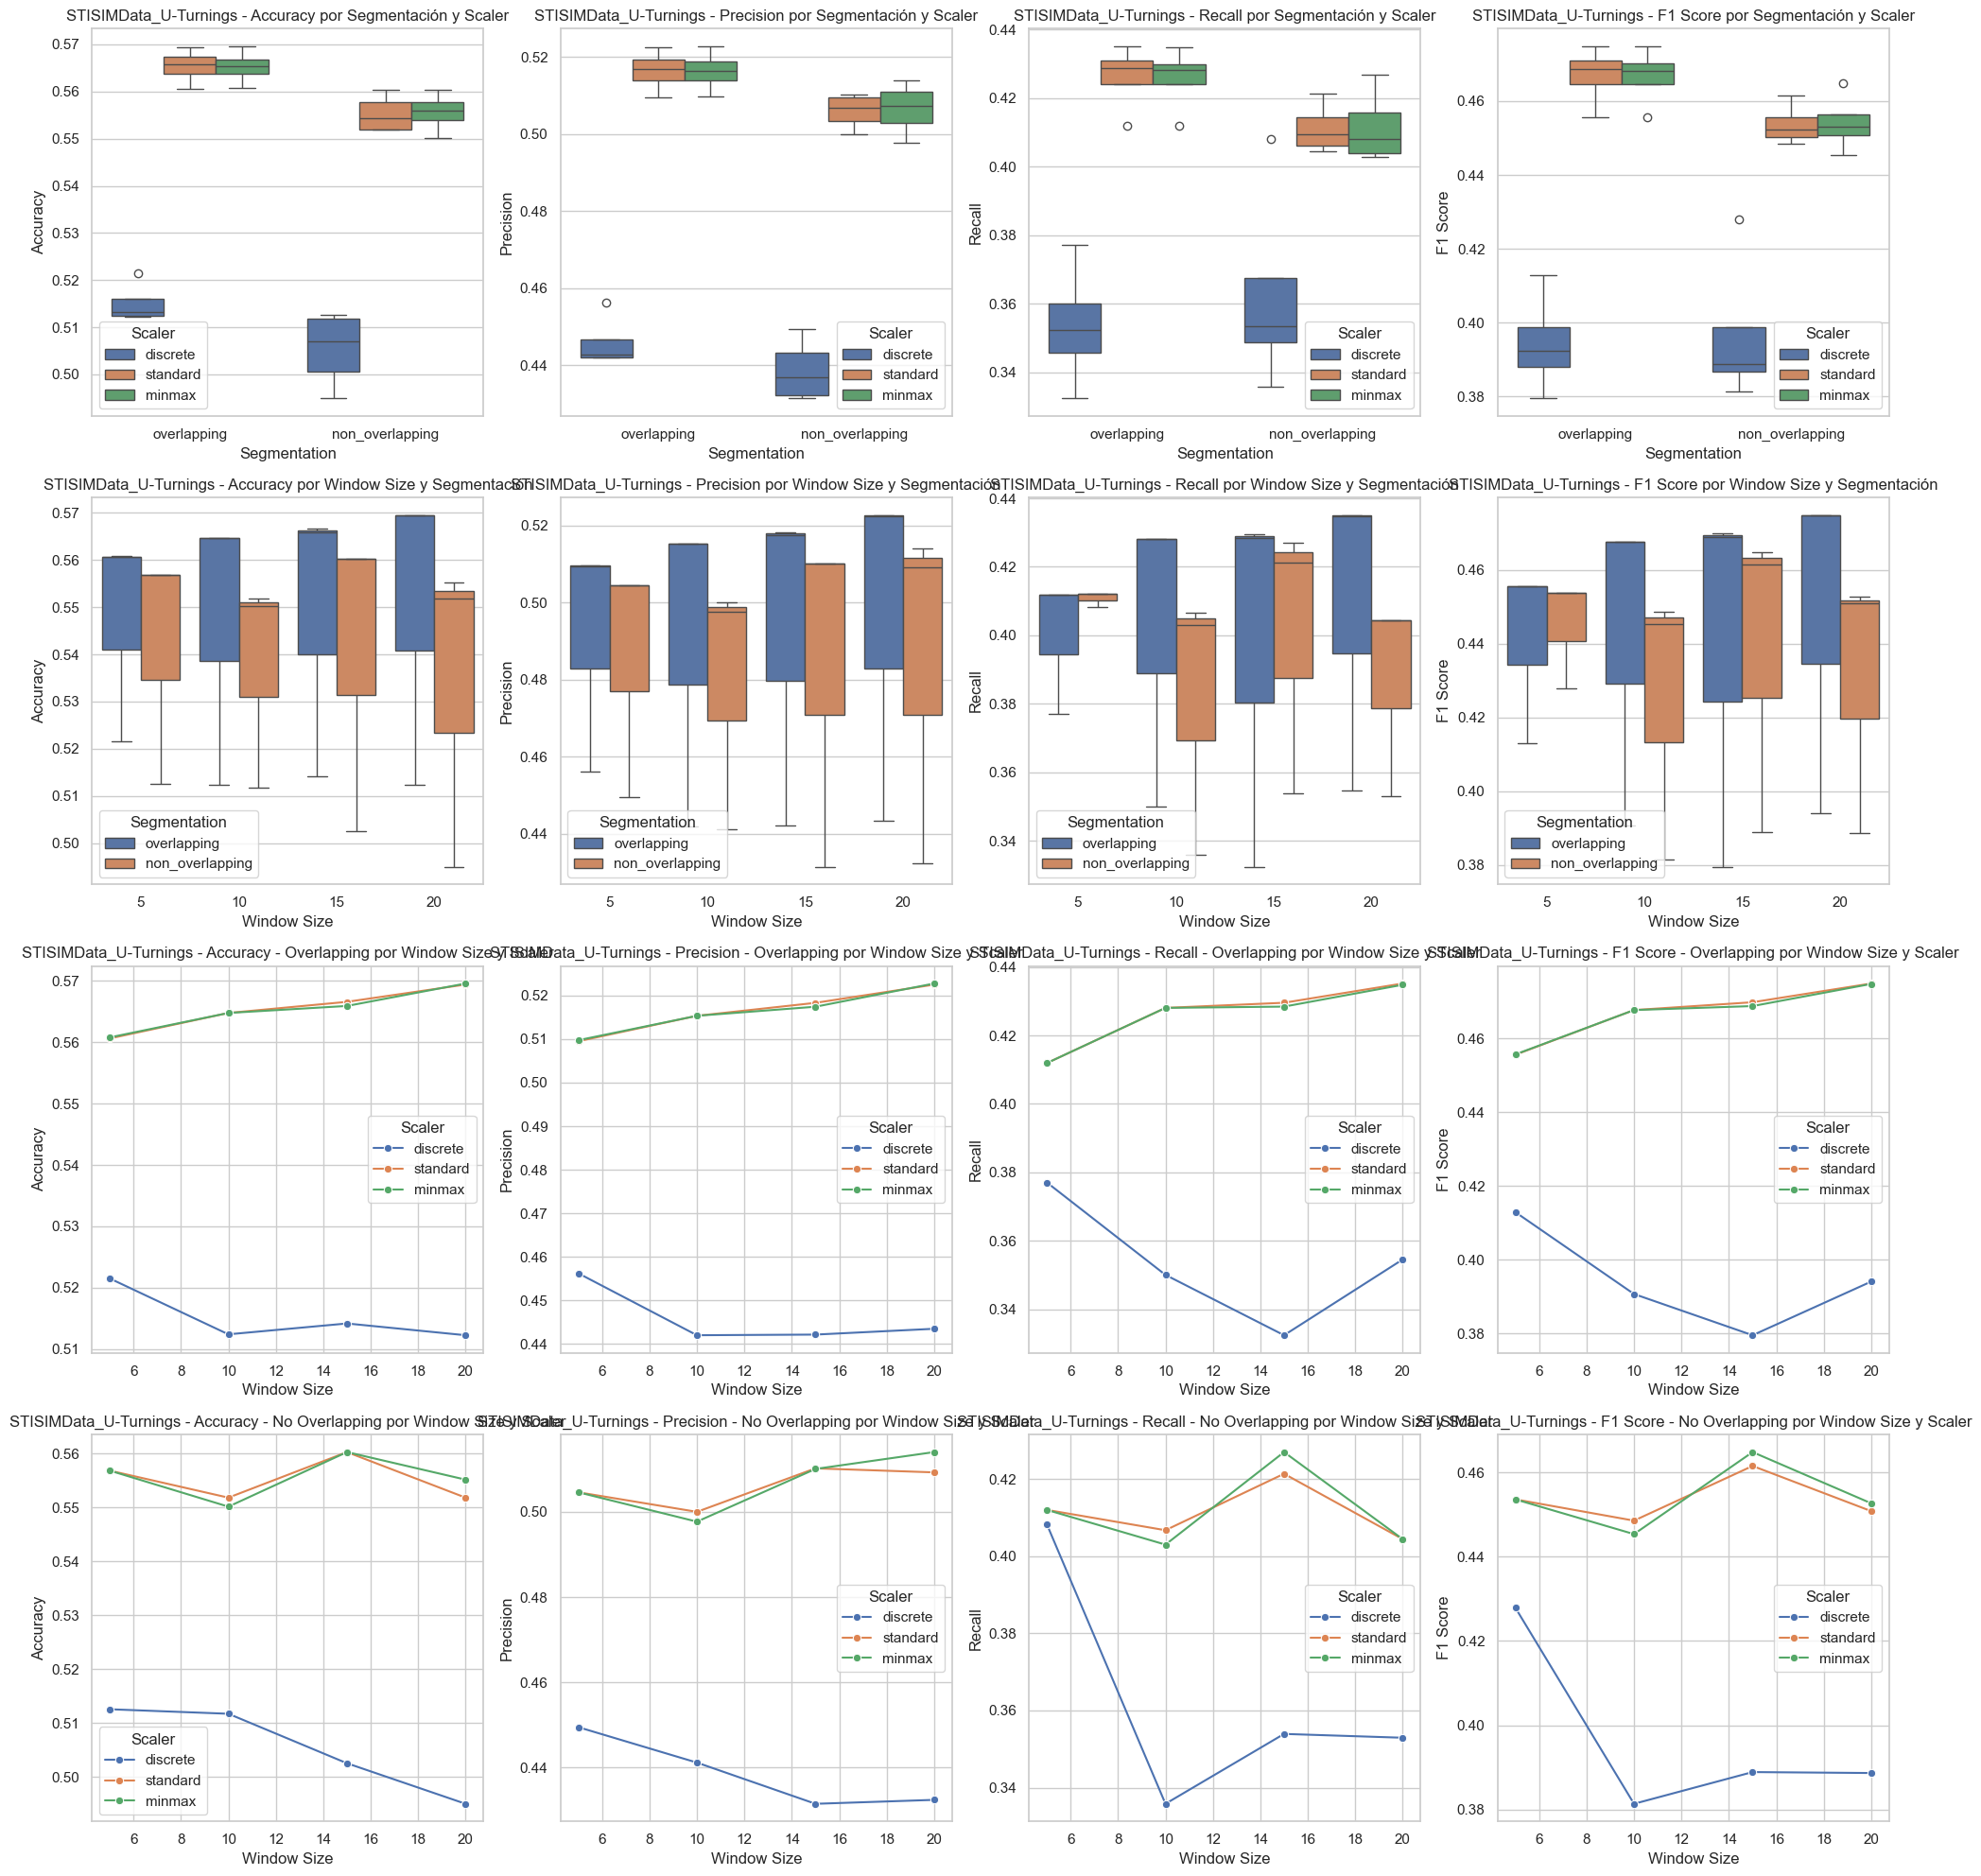

In [12]:
fig, axes = plt.subplots(4, len(metrics), figsize=(20, 20))

for j, metric in enumerate(metrics):
    sns.boxplot(x='Segmentation', y=metric, hue='Scaler', data=maneuver_data, ax=axes[0, j])
    axes[0, j].set_title(f"{maneuver} - {metric} por Segmentación y Scaler")
    axes[0, j].set_xlabel("Segmentation")
    axes[0, j].set_ylabel(metric)
    axes[0, j].legend(title='Scaler')

    sns.boxplot(x='Window Size', y=metric, hue='Segmentation', data=maneuver_data, ax=axes[1, j])
    axes[1, j].set_title(f"{maneuver} - {metric} por Window Size y Segmentación")
    axes[1, j].set_xlabel("Window Size")
    axes[1, j].set_ylabel(metric)
    axes[1, j].legend(title='Segmentation')
    
    seg_man_data = maneuver_data[maneuver_data['Segmentation'] == 'overlapping']
    sns.lineplot(x='Window Size', y=metric, hue='Scaler', data=seg_man_data, marker='o', ax=axes[2, j])
    axes[2, j].set_title(f"{maneuver} - {metric} - Overlapping por Window Size y Scaler")
    axes[2, j].set_xlabel("Window Size")
    axes[2, j].set_ylabel(metric)
    axes[2, j].legend(title='Scaler')

    seg_man_data = maneuver_data[maneuver_data['Segmentation'] == 'non_overlapping']
    sns.lineplot(x='Window Size', y=metric, hue='Scaler', data=seg_man_data, marker='o', ax=axes[3, j])
    axes[3, j].set_title(f"{maneuver} - {metric} - No Overlapping por Window Size y Scaler")
    axes[3, j].set_xlabel("Window Size")
    axes[3, j].set_ylabel(metric)
    axes[3, j].legend(title='Scaler')

plt.tight_layout()
plt.show()

Al analizar la diferencia entre modelos con y sin solapamiento, se observa que los conjuntos con solapamiento tienden a generar mejores resultados, especialmente cuando se aplican escalados estándar o de mínimos y máximos. Esto sugiere que para este tipo de acción, una generalización de los datos pierde el contexto y perjudica a la hora de predecir.

Los gráficos de las dos últimas filas muestran que la discretización sigue presentando valores inferiores. Además, se nota que un mayor tamaño de ventana mejora los resultados del modelo, proporcionando más información útil para la clasificación de la maniobra.

Como conclusión, el mejor modelo para la maniobra U-Turnings es aquel con escalado de máximos y mínimos y ventanas con solapamiento de tamaño 20, obteniendo un *f1-score* de $0.47$. Para el caso con solapamiento, el *f1-score* es de $0.46$, reflejando una ligera disminución en el rendimiento.

# 4. Discusión de Hallazgos

El análisis de las maniobras revela patrones claros en el impacto del solapamiento, el tamaño de las ventanas y los diferentes tipos de escalado en el rendimiento de los modelos. A continuación, se presentan los hallazgos clave organizados por cada tipo de maniobra.

1. **3-Step Turnings**  
    - **Overlapping vs No Overlapping:** Los modelos sin solapamiento presentan mejor rendimiento, evitando el *overfitting* observado en los conjuntos con solapamiento.  
    - **Tamaño de Ventanas:** A medida que aumenta el tamaño de la ventana, se mejora la comprensión del modelo y los resultados.  
    - **Escalados:** El escalado estándar ofrece el mejor desempeño, mientras que la discretización reduce significativamente la calidad del modelo.  

2. **Overtaking**  
    - **Overlapping vs No Overlapping:** Los modelos sin solapamiento superan en precisión y f1-score a los modelos con solapamiento, salvo en discretización, donde el solapamiento ayuda a compensar la pérdida de información.  
    - **Tamaño de Ventanas:** Ventanas más grandes aportan mejor contexto, mejorando los resultados.  
    - **Escalados:** El escalado estándar es el más eficiente, con una diferencia de hasta 20 puntos frente a la discretización.  

3. **Stopping**  
    - **Overlapping vs No Overlapping:** Sin solapamiento se logra mejor generalización, mientras que con discretización el solapamiento mejora la estabilidad.  
    - **Tamaño de Ventanas:** Ventanas más grandes contribuyen a un mejor rendimiento.  
    - **Escalados:** El escalado estándar es el más efectivo, mientras que la discretización pierde información clave.  

4. **Turnings**  
    - **Overlapping vs No Overlapping:** Sin solapamiento se obtiene mejor generalización, aunque en discretización el solapamiento mejora la predicción.  
    - **Tamaño de Ventanas:** Incrementar el tamaño de ventana mejora la calidad del modelo.  
    - **Escalados:** A diferencia de otras maniobras, la discretización muestra un mejor rendimiento en este caso.  

5. **U-Turnings**  
    - **Overlapping vs No Overlapping:** A diferencia de otras maniobras, los conjuntos con solapamiento mejoran la precisión.  
    - **Tamaño de Ventanas:** Un mayor tamaño de ventana permite capturar mejor la dinámica de la maniobra.  
    - **Escalados:** El escalado de máximos y mínimos es el más efectivo, mientras que la discretización perjudica el rendimiento.  


# 5. Conclusiones

El análisis realizado ha permitido evaluar el impacto de distintos factores en el rendimiento de los modelos para la predicción de maniobras. Se ha estudiado el efecto del uso de ventanas deslizantes con y sin solapamiento, el tamaño de las ventanas y los diferentes métodos de escalado aplicados a los datos. A través del análisis de métricas como *accuracy, precision, recall y f1-score*, se han identificado patrones clave que influyen en la capacidad predictiva de los modelos. A continuación, se presentan las principales conclusiones obtenidas en función de estas variables.

- **Overlapping vs No Overlapping.**
    Se observa que los modelos con ventanas sin solapamiento generalmente ofrecen mejores resultados en términos de precisión y capacidad de generalización. Esto es particularmente cierto para los datos escalados, donde las ventanas sin solapamiento evitan el riesgo de overfitting. Sin embargo, en los casos donde se emplea discretización, las ventanas con solapamiento muestran un mejor rendimiento, ya que la discretización ya introduce una forma de generalización en los datos, lo que hace que el solapamiento ayude a mejorar la clasificación en estos casos específicos.

- **Tamaño de Ventanas.**
    El análisis muestra una tendencia clara: un mayor tamaño de ventana mejora el rendimiento de los modelos en todas las métricas. Un tamaño de ventana más grande proporciona más contexto a la hora de analizar la maniobra, lo que permite una mejor identificación de patrones. Sin embargo, este efecto varía en función de la segmentación utilizada y el tipo de escalado, por lo que es importante ajustar el tamaño de ventana a cada caso particular.

- **Escalados.**
    Los modelos que emplean escalado estándar o de máximos y mínimos presentan un mejor desempeño en comparación con aquellos que utilizan discretización. La discretización tiende a introducir pérdida de información, lo que afecta negativamente a las métricas. Los escalados estándar permiten mantener la coherencia de los datos y mejorar la capacidad de generalización, lo que se refleja en valores de f1-score superiores en la mayoría de los casos analizados.

- **Capacidad Predictiva de los Modelos.**
    En términos generales, los modelos con datos escalados y ventanas sin solapamiento han mostrado una mejor capacidad predictiva en la mayoría de las maniobras analizadas, excepto en Turnings, donde la discretización ha sido más efectiva. El tamaño de ventana juega un papel crucial en la mejora del rendimiento, proporcionando mejor comprensión del contexto de cada maniobra. Finalmente, el solapamiento de ventanas debe considerarse cuidadosamente, ya que puede inducir overfitting en algunos casos o mejorar el rendimiento cuando se usa discretización.

Cada maniobra tiene características específicas que influyen en qué configuración es óptima, pero, en general, un escalado adecuado y un tamaño de ventana suficientemente grande son claves para mejorar la capacidad predictiva de los modelos.

## 5.1. Líneas Futuras

A continuación, para mejorar y expandir los resultados obtenidos, se proponen las siguientes líneas de trabajo:

- **Aumento del conjunto de datos**: Ampliar la cantidad y diversidad de datos podría mejorar la capacidad de generalización de los modelos y reducir el riesgo de *overfitting*, a través de nuevos conductores o los mismos en otras situaciones y entornos.

- **Optimización de hiperparámetros en Random Forest (RF)**: Realizar una búsqueda más exhaustiva de hiperparámetros podría mejorar el rendimiento del modelo y su adaptabilidad a diferentes preprocesamientos.

- **Exploración de diferentes tipos de IA**: Probar modelos más adecuados para datos temporales, como *Support Vector Machines* (SVM) y redes neuronales recurrentes como *Long Short-Term Memory* (LSTM), para capturar mejor la evolución de las maniobras.

- **Evaluación de distintos preprocesados**: Experimentar con diversas estrategias de escalado, discretización y transformación de series temporales para encontrar combinaciones óptimas según la maniobra analizada.